# IBM DATA SCIENCE - Final Capstone Project
# Economic and locational comparison of Hong Kong and Singapore
### by Fabien Nugier

In this notebook, we propose to compare Hong Kong and Singapore - two of the 4 Asian Tigers (with Taiwan and South Korea) - and to draw some description of the two economies.

This work can benefit different kinds of stakeholders, for example a company or a bank hesitating between Singapore and Hong Kong for a forthcoming implantation. It can also be useful to a travel agency wishing to compare some cities in the world with these two locations, and better serve requirement of clients.

<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><h3><a href="#1">1. COMPARISON ON ECONOMIC INDICATORS</a></h3></li>
        <li><a href="#11">1.1 Getting Economic Data</a></li>
        <li><a href="#12">1.2 Getting Yearly Average Currency Exchange Rates</a></li>
        <li><a href="#13">1.3 Comparing Economic Indicators</a></li>
        <li><a href="#14">1.4 - Consumer Price Index (CPI)</a></li>
        <li><h3><a href="#2">2. COMPARISON ON DISTRICT VENUES</a></h3></li>
        <li><a href="#21">2.1 Singapore Districts</a></li>
        <li><a href="#22">2.2 Hong Kong Cities and Districts</a></li>
        <li><a href="#23">2.3 Singapore Venues</a></li>
        <li><a href="#24">2.4 Hong Kong Venues</a></li>
        <li><h3><a href="#3">3. INCREASING DATA SAMPLING</a></h3></li>
        <li><a href="#31">3.1 Increasing the venues for both Tigers</a></li>
        <li><a href="#32">3.2 Comparing the Tigers with a decision tree</a></li>
    </ol>
</div>
<br>
<hr>

Credentials for Folium:

In [1]:
CLIENT_ID = ''
CLIENT_SECRET = ''
VERSION = '20180605'

# 1 - COMPARISON ON ECONOMIC INDICATORS <a id="1"></a>

Importing libraries for this notebook:

In [2]:
# For arrays:
import numpy as np

# For data structures:
import pandas as pd

# For plots and visualizations:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

# To compute the R^2 and MSE of fits:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# To plot maps:
import folium

# To scrape HTML pages:
from bs4 import BeautifulSoup
import requests

# To generate random numbers:
import random

# For machine learning methods:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# For k-means clustering:
from sklearn.cluster import KMeans

# For Decision Trees:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

# For displaying text on top of previous text
# (to avoid long lists of values being printed):
from IPython.display import display, clear_output

# To count elements in lists:
from collections import Counter

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## 1.1 - Getting Economic Data <a id="11"></a>

We import data from the United Nations:

http://data.un.org/Data.aspx?q=GDP+by+Type+of+Expenditure+at+current+prices+&d=SNAAMA&f=grID%3a101%3bcurrID%3aNCU%3bpcFlag%3a0

In [3]:
df_brute = pd.read_csv('./UNdata_Export_20191024_114358730.csv')

In [4]:
print(df_brute.shape)
df_brute.head()

(864, 7)


,Table Code,Country or Area Code,Country or Area,Year,Item Code,Item,Value
0,1,344,"China, Hong Kong SAR",2017,1,Final consumption expenditure,2045648000000
1,1,344,"China, Hong Kong SAR",2017,2,Household consumption expenditure (including N...,1783704000000
2,1,344,"China, Hong Kong SAR",2017,3,General government final consumption expenditure,261944000000
3,1,344,"China, Hong Kong SAR",2017,4,Gross capital formation,595947000000
4,1,344,"China, Hong Kong SAR",2017,5,Gross fixed capital formation (including Acqui...,584567000000


Let us remove the columns 'Table Code' and 'Country or Area Code' and symplify names.

In [5]:
df_brute.drop(columns=['Table Code', 'Country or Area Code'], axis=1, inplace=True)
df_brute.replace(to_replace='China, Hong Kong SAR', value='Hong Kong', inplace=True)
df_brute.head(10)

,Country or Area,Year,Item Code,Item,Value
0,Hong Kong,2017,1,Final consumption expenditure,2045648000000
1,Hong Kong,2017,2,Household consumption expenditure (including N...,1783704000000
2,Hong Kong,2017,3,General government final consumption expenditure,261944000000
3,Hong Kong,2017,4,Gross capital formation,595947000000
4,Hong Kong,2017,5,Gross fixed capital formation (including Acqui...,584567000000
5,Hong Kong,2017,6,Changes in inventories,11380000000
6,Hong Kong,2017,7,Exports of goods and services,5000468000000
7,Hong Kong,2017,8,Imports of goods and services,4979426000000
8,Hong Kong,2017,9,Gross Domestic Product (GDP),2662637000000
9,Hong Kong,2016,1,Final consumption expenditure,1897193000000


Let us create one data frame for Hong Kong and one for Singapore.

In [6]:
list_items = df_brute['Item'].unique().tolist()
list_cols = []
list_cols.append('Year')
for it in list_items:
    list_cols.append(it)
list_cols

['Year',
 'Final consumption expenditure',
 'Household consumption expenditure (including Non-profit institutions serving households)',
 'General government final consumption expenditure',
 'Gross capital formation',
 'Gross fixed capital formation (including Acquisitions less disposals of valuables)',
 'Changes in inventories',
 'Exports of goods and services',
 'Imports of goods and services',
 'Gross Domestic Product (GDP)']

In [7]:
df_HK = pd.DataFrame(columns=list_cols)
df_SG = pd.DataFrame(columns=list_cols)
df_HK.head()

,Year,Final consumption expenditure,Household consumption expenditure (including Non-profit institutions serving households),General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product (GDP)


Let us fill up their values with the initial data frame.

In [8]:
df_brute.head()

,Country or Area,Year,Item Code,Item,Value
0,Hong Kong,2017,1,Final consumption expenditure,2045648000000
1,Hong Kong,2017,2,Household consumption expenditure (including N...,1783704000000
2,Hong Kong,2017,3,General government final consumption expenditure,261944000000
3,Hong Kong,2017,4,Gross capital formation,595947000000
4,Hong Kong,2017,5,Gross fixed capital formation (including Acqui...,584567000000


In [9]:
for i in range(0,len(df_brute.index),9):
    list_keys = ['Year'] + df_brute.iloc[i:i+9,3].tolist() 
    list_val = [df_brute.iloc[i,1]] + df_brute.iloc[i:i+9,4].tolist()
    dic = dict(zip(list_keys,list_val))
    
    if df_brute.iloc[i,0] == 'Hong Kong':
        df_HK = df_HK.append(dic, ignore_index=True)
    elif df_brute.iloc[i,0] == 'Singapore':
        df_SG = df_SG.append(dic, ignore_index=True)
    else:
        print("Error")

In [10]:
print(df_HK.shape)
print(df_SG.shape)

(48, 10)
(48, 10)


In [11]:
df_HK.info()
df_HK.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
Year                                                                                        48 non-null object
Final consumption expenditure                                                               48 non-null object
Household consumption expenditure (including Non-profit institutions serving households)    48 non-null object
General government final consumption expenditure                                            48 non-null object
Gross capital formation                                                                     48 non-null object
Gross fixed capital formation (including Acquisitions less disposals of valuables)          48 non-null object
Changes in inventories                                                                      48 non-null object
Exports of goods and services                                                               48 non-null object
Imports o

Year                                                                                        0
Final consumption expenditure                                                               0
Household consumption expenditure (including Non-profit institutions serving households)    0
General government final consumption expenditure                                            0
Gross capital formation                                                                     0
Gross fixed capital formation (including Acquisitions less disposals of valuables)          0
Changes in inventories                                                                      0
Exports of goods and services                                                               0
Imports of goods and services                                                               0
Gross Domestic Product (GDP)                                                                0
dtype: int64

In [12]:
df_SG.info()
df_SG.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
Year                                                                                        48 non-null object
Final consumption expenditure                                                               48 non-null object
Household consumption expenditure (including Non-profit institutions serving households)    48 non-null object
General government final consumption expenditure                                            48 non-null object
Gross capital formation                                                                     48 non-null object
Gross fixed capital formation (including Acquisitions less disposals of valuables)          48 non-null object
Changes in inventories                                                                      48 non-null object
Exports of goods and services                                                               48 non-null object
Imports o

Year                                                                                        0
Final consumption expenditure                                                               0
Household consumption expenditure (including Non-profit institutions serving households)    0
General government final consumption expenditure                                            0
Gross capital formation                                                                     0
Gross fixed capital formation (including Acquisitions less disposals of valuables)          0
Changes in inventories                                                                      0
Exports of goods and services                                                               0
Imports of goods and services                                                               0
Gross Domestic Product (GDP)                                                                0
dtype: int64

Let's convert the types of data.

In [13]:
df_HK = df_HK.astype('int64')
df_SG = df_SG.astype('int64')

And simplify the titles a bit:

In [14]:
df_HK.rename(columns={'Household consumption expenditure (including Non-profit institutions serving households)':'Household consumption expenditure', 'Gross fixed capital formation (including Acquisitions less disposals of valuables':'Gross fixed capital formation', 'Gross fixed capital formation (including Acquisitions less disposals of valuables)':'Gross fixed capital formation', 'Gross Domestic Product (GDP)':'Gross Domestic Product'}, inplace=True)
df_SG.rename(columns={'Household consumption expenditure (including Non-profit institutions serving households)':'Household consumption expenditure', 'Gross fixed capital formation (including Acquisitions less disposals of valuables':'Gross fixed capital formation', 'Gross fixed capital formation (including Acquisitions less disposals of valuables)':'Gross fixed capital formation', 'Gross Domestic Product (GDP)':'Gross Domestic Product'}, inplace=True)

In [15]:
df_HK.head()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
0,2017,2045648000000,1783704000000,261944000000,595947000000,584567000000,11380000000,5000468000000,4979426000000,2662637000000
1,2016,1897193000000,1649585000000,247608000000,536470000000,536023000000,447000000,4657725000000,4600685000000,2490703000000
2,2015,1824354000000,1593091000000,231263000000,516625000000,537205000000,-20580000000,4698173000000,4640872000000,2398280000000
3,2014,1716984000000,1502768000000,214216000000,538389000000,530916000000,7473000000,4815854000000,4811222000000,2260005000000
4,2013,1611630000000,1413058000000,198572000000,513843000000,515516000000,-1673000000,4738699000000,4725867000000,2138305000000


In [16]:
df_SG.head()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
0,2017,204123543479,155037836607,49122661149,111129034048,99619255650,11509778398,760821953288,658225254434,447283500000
1,2016,196099200000,149824700000,46274500000,103974500000,102014500000,1960000000,706277300000,600108700000,427938800000
2,2015,193658200000,150263600000,43394600000,109246700000,106396100000,2850600000,726136000000,620354700000,418073600000
3,2014,182456600000,143450600000,39006000000,111818600000,104382600000,7436000000,755251600000,659341400000,394751700000
4,2013,176781200000,138775400000,38005800000,115396300000,104910200000,10486100000,734970800000,650321900000,380963700000


**Note:** after returning to the UN dataset page I have realized that the Item could have been used as pivot and it was possible to directly obtain the 'Item' as columns. I have decided to keep the document as it is because this leads to the same resulting tables and the part above is also a good illustration of the data manipulation we can have to do sometimes (even if here it wasn't necessary).

## 1.2 Getting yearly average currency exchange rates

Since the data in the previous data frames are in local currencies, we have to bring them into a common currency to allow comparison. The currency we use does not matter as there should not be any arbitrage issues for a year average.

We use data given by *Investing.com* which can provide monthly averaged currency exchange rates after signing in and downloading the data under csv form. See this page for example:
https://www.investing.com/currencies/usd-hkd-historical-data

Let us load the csv file for the pair HKD/USD into a data frame.

In [17]:
df_HKDUSD = pd.read_csv('./USD_HKD_Data.csv')
df_HKDUSD.tail()

,Date,Price,Open,High,Low,Change %
486,Jun 77,4.6795,4.6795,4.6795,4.6795,-0.27%
487,May 77,4.6920,4.6920,4.6920,4.6920,0.86%
488,Apr 77,4.6520,4.6520,4.6520,4.6520,0.33%
489,Mar 77,4.6365,4.6365,4.6365,4.6365,-0.20%
490,Feb 77,4.6460,4.6460,4.6460,4.6460,-0.48%


In [18]:
df_HKDUSD = df_HKDUSD[['Date','Price']]
df_HKDUSD.head(15)

,Date,Price
0,Dec 17,7.8129
1,Nov 17,7.8098
2,Oct 17,7.8011
3,Sep 17,7.8113
4,Aug 17,7.8259
5,Jul 17,7.8102
6,Jun 17,7.8069
7,May 17,7.7920
8,Apr 17,7.7784
9,Mar 17,7.7710


We now take data for each month and place them in different columns so that each row represent a whole year.

In [19]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][::-1]
list_keys = ['Year'] + months
price_HKDUSD = pd.DataFrame(columns=list_keys)

group_size = 12
for i in range(0,len(df_HKDUSD.index),group_size):
    list_val = [df_HKDUSD.iloc[i,0][-2:]] + df_HKDUSD.iloc[i:i+group_size,1].tolist()
    dic = dict(zip(list_keys,list_val))
    price_HKDUSD = price_HKDUSD.append(dic, ignore_index=True)
price_HKDUSD.head()

,Year,Dec,Nov,Oct,Sep,Aug,Jul,Jun,May,Apr,Mar,Feb,Jan
0,17,7.8129,7.8098,7.8011,7.8113,7.8259,7.8102,7.8069,7.7920,7.7784,7.7710,7.7623,7.7589
1,16,7.7545,7.7565,7.7553,7.7562,7.7572,7.7577,7.7591,7.7714,7.7571,7.7572,7.7773,7.7804
2,15,7.7503,7.7530,7.7507,7.7501,7.7500,7.7529,7.7515,7.7530,7.7506,7.7524,7.7558,7.7523
3,14,7.7539,7.7549,7.7550,7.7652,7.7502,7.7501,7.7504,7.7529,7.7527,7.7568,7.7603,7.7637
4,13,7.7539,7.7527,7.7530,7.7560,7.7550,7.7558,7.7565,7.7626,7.7602,7.7635,7.7552,7.7552


And we modify the year data to make them more readable.

In [20]:
def years(x):
    first_char = x[0]
    if first_char == '1':
        x = '201' + x[1]
        return x
    elif first_char == '0':
        x = '200' + x[1]
        return x
    elif first_char == '9':
        x = '199' + x[1]
        return x
    elif first_char == '8':
        x = '198' + x[1]
        return x
    elif first_char == '7':
        x = '197' + x[1]
        return x

price_HKDUSD['Year'] = price_HKDUSD['Year'].apply(years)
price_HKDUSD.head()

,Year,Dec,Nov,Oct,Sep,Aug,Jul,Jun,May,Apr,Mar,Feb,Jan
0,2017,7.8129,7.8098,7.8011,7.8113,7.8259,7.8102,7.8069,7.7920,7.7784,7.7710,7.7623,7.7589
1,2016,7.7545,7.7565,7.7553,7.7562,7.7572,7.7577,7.7591,7.7714,7.7571,7.7572,7.7773,7.7804
2,2015,7.7503,7.7530,7.7507,7.7501,7.7500,7.7529,7.7515,7.7530,7.7506,7.7524,7.7558,7.7523
3,2014,7.7539,7.7549,7.7550,7.7652,7.7502,7.7501,7.7504,7.7529,7.7527,7.7568,7.7603,7.7637
4,2013,7.7539,7.7527,7.7530,7.7560,7.7550,7.7558,7.7565,7.7626,7.7602,7.7635,7.7552,7.7552


We can now average the 12 months for each year.

In [21]:
price_HKDUSD['AVG'] = price_HKDUSD[months].mean(axis=1)
price_HKDUSD.head()

,Year,Dec,Nov,Oct,Sep,Aug,Jul,Jun,May,Apr,Mar,Feb,Jan,AVG
0,2017,7.8129,7.8098,7.8011,7.8113,7.8259,7.8102,7.8069,7.7920,7.7784,7.7710,7.7623,7.7589,7.795058
1,2016,7.7545,7.7565,7.7553,7.7562,7.7572,7.7577,7.7591,7.7714,7.7571,7.7572,7.7773,7.7804,7.761658
2,2015,7.7503,7.7530,7.7507,7.7501,7.7500,7.7529,7.7515,7.7530,7.7506,7.7524,7.7558,7.7523,7.751883
3,2014,7.7539,7.7549,7.7550,7.7652,7.7502,7.7501,7.7504,7.7529,7.7527,7.7568,7.7603,7.7637,7.755508
4,2013,7.7539,7.7527,7.7530,7.7560,7.7550,7.7558,7.7565,7.7626,7.7602,7.7635,7.7552,7.7552,7.756633


And suppress month columns.

In [22]:
price_HKDUSD = price_HKDUSD[['Year', 'AVG']]
price_HKDUSD.tail()

,Year,AVG
36,1981,5.612583
37,1980,4.981583
38,1979,4.995167
39,1978,4.684350
40,1977,4.659927


In [23]:
price_HKDUSD['Year'] = price_HKDUSD['Year'].astype('int64')

Here is a plot of that average.

<Figure size 432x288 with 0 Axes>

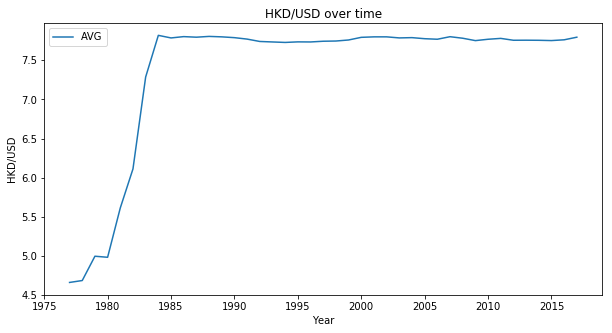

In [24]:
fig = plt.gcf()
price_HKDUSD.plot(x='Year', y='AVG', figsize=(10,5))
plt.title('HKD/USD over time')
plt.ylabel('HKD/USD')
plt.xlabel('Year')

plt.savefig('./HKDUSD.jpg', dpi=300)
plt.show()
plt.close()

Notice here that the x-axis represent the rows, and thus goes towards the past. In 1972, the HKD was "pegged" to the USD at a rate HKD7.8 = USD1, which explains why the value does not evolve much in the years after.

We just have to do exactly the same for USD/SGD.

In [25]:
df_SGDUSD = pd.read_csv('./USD_SGD_Data.csv')
df_SGDUSD.tail()

df_SGDUSD = df_SGDUSD[['Date','Price']]
df_SGDUSD.head(15)

price_SGDUSD = pd.DataFrame(columns=list_keys)

for i in range(0,len(df_SGDUSD.index),group_size):
    list_val = [df_SGDUSD.iloc[i,0][-2:]] + df_SGDUSD.iloc[i:i+group_size,1].tolist()
    dic = dict(zip(list_keys,list_val))
    price_SGDUSD = price_SGDUSD.append(dic, ignore_index=True)

price_SGDUSD['Year'] = price_SGDUSD['Year'].apply(years)
price_SGDUSD['AVG'] = price_SGDUSD[months].mean(axis=1)
price_SGDUSD = price_SGDUSD[['Year', 'AVG']]
price_SGDUSD.tail()

,Year,AVG
32,1985,2.188917
33,1984,2.137625
34,1983,2.114375
35,1982,2.141667
36,1981,2.111000


In [26]:
price_SGDUSD['Year'] = price_SGDUSD['Year'].astype('int64')

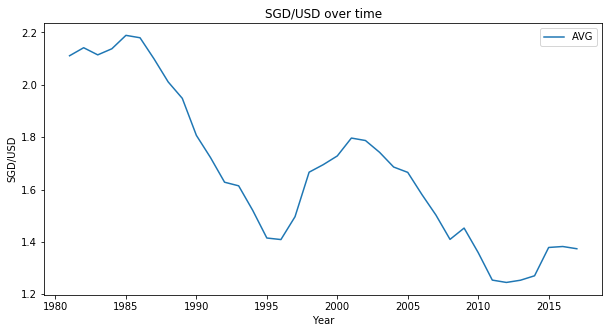

In [27]:
price_SGDUSD.plot(x='Year', y='AVG', figsize=(10,5))
plt.title('SGD/USD over time')
plt.ylabel('SGD/USD')
plt.xlabel('Year')

plt.savefig('./SGDUSD.jpg', dpi=300)
plt.show()
plt.close()

We can now correct the previous data frames containing economic indicators to put them both in USD.

In [28]:
df_HK.tail()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
43,1974,33552000000,30800000000,2752000000,11424000000,10746000000,678000000,40926000000,38662000000,47240000000
44,1973,29261000000,27116000000,2145000000,9457000000,9154000000,303000000,35302000000,32693000000,41327000000
45,1972,22110000000,20404000000,1706000000,7544000000,7308000000,236000000,27184000000,24625000000,32213000000
46,1971,19065000000,17663000000,1402000000,6495000000,6298000000,197000000,23841000000,22720000000,26681000000
47,1970,16611000000,15304000000,1307000000,4715000000,4544000000,171000000,21532000000,19752000000,23106000000


In [29]:
df_HK = df_HK.drop(range(41,48,1))
df_HK.tail()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
36,1981,115566000000,103722000000,11844000000,60647000000,56694000000,3953000000,157146000000,159781000000,173578000000
37,1980,94305000000,86233000000,8072000000,50056000000,46311000000,3745000000,127455000000,128197000000,143619000000
38,1979,74457000000,68251000000,6206000000,36777000000,33521000000,3256000000,101007000000,99550000000,112691000000
39,1978,60267000000,55378000000,4889000000,24645000000,22578000000,2067000000,73416000000,72546000000,85782000000
40,1977,49060000000,44971000000,4089000000,19436000000,17734000000,1702000000,61091000000,56303000000,73284000000


In [30]:
df_HK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 10 columns):
Year                                                41 non-null int64
Final consumption expenditure                       41 non-null int64
Household consumption expenditure                   41 non-null int64
General government final consumption expenditure    41 non-null int64
Gross capital formation                             41 non-null int64
Gross fixed capital formation                       41 non-null int64
Changes in inventories                              41 non-null int64
Exports of goods and services                       41 non-null int64
Imports of goods and services                       41 non-null int64
Gross Domestic Product                              41 non-null int64
dtypes: int64(10)
memory usage: 3.5 KB


In [31]:
print(df_HK.update(df_HK.iloc[:,1:10].div(price_HKDUSD.AVG, 0)))
df_HK.head()

None


,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
0,2017,2.624288e+11,2.288250e+11,3.360385e+10,7.645190e+10,7.499200e+10,1.459899e+09,6.414921e+11,6.387927e+11,3.415801e+11
1,2016,2.444314e+11,2.125300e+11,3.190143e+10,6.911796e+10,6.906037e+10,5.759079e+07,6.000941e+11,5.927451e+11,3.208983e+11
2,2015,2.353433e+11,2.055102e+11,2.983314e+10,6.664509e+10,6.929993e+10,-2.654839e+09,6.060686e+11,5.986767e+11,3.093803e+11
3,2014,2.213890e+11,1.937678e+11,2.762114e+10,6.942021e+10,6.845663e+10,9.635732e+08,6.209592e+11,6.203619e+11,2.914064e+11
4,2013,2.077744e+11,1.821741e+11,2.560028e+10,6.624562e+10,6.646131e+10,-2.156864e+08,6.109221e+11,6.092678e+11,2.756744e+11


In [32]:
df_SG.tail()

,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
43,1974,9069700000,7759500000,1310200000,5709800000,4812600000,897200000,19179300000,21106800000,12819700000
44,1973,7524100000,6399500000,1124600000,4045200000,3606300000,438900000,12301800000,13243200000,10388700000
45,1972,6106100000,5111200000,994900000,3392700000,3092600000,300100000,8861800000,10154900000,8297600000
46,1971,5429000000,4564300000,864700000,2778100000,2507400000,270700000,8278700000,9690300000,6926100000
47,1970,4643400000,3947600000,695800000,2244500000,1888500000,356000000,7409500000,8526900000,5876000000


In [33]:
df_SG = df_SG.drop(range(37,48,1))
print(df_SG.update(df_SG.iloc[:,1:10].div(price_SGDUSD.AVG, 0)))
df_SG.tail()

None


,Year,Final consumption expenditure,Household consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation,Changes in inventories,Exports of goods and services,Imports of goods and services,Gross Domestic Product
32,1985,1.087003e+10,8.369346e+09,2.500689e+09,7.671512e+09,7.613766e+09,5.774546e+07,2.841693e+10,2.836097e+10,1.865028e+10
33,1984,1.057098e+10,8.499199e+09,2.071785e+09,9.160119e+09,9.022069e+09,1.380504e+08,3.054469e+10,3.058282e+10,1.950857e+10
34,1983,9.797363e+09,7.869039e+09,1.928324e+09,8.360059e+09,8.297819e+09,6.224061e+07,3.003521e+10,2.993007e+10,1.799071e+10
35,1982,8.959284e+09,7.258132e+09,1.701152e+09,7.340732e+09,7.269245e+09,7.148638e+07,2.940934e+10,2.970005e+10,1.586139e+10
36,1981,8.240407e+09,6.890431e+09,1.349976e+09,6.438228e+09,6.058171e+09,3.800568e+08,2.849474e+10,2.898546e+10,1.437456e+10


## 1.3 - Comparing Economic Indicators <a id="13"></a>

### Plotting the GDP

Let's recall the columns names:

In [34]:
df_HK.head().columns.tolist()

['Year',
 'Final consumption expenditure',
 'Household consumption expenditure',
 'General government final consumption expenditure',
 'Gross capital formation',
 'Gross fixed capital formation',
 'Changes in inventories',
 'Exports of goods and services',
 'Imports of goods and services',
 'Gross Domestic Product']

And let us do a new data frame that contains the GDP of the two tigers in USD.

In [35]:
left_frame = df_HK[['Year','Gross Domestic Product']].astype('str')
left_frame.rename(columns={'Gross Domestic Product':'GDP'}, inplace=True)
right_frame = df_SG[['Year','Gross Domestic Product']].astype('str')
right_frame.rename(columns={'Gross Domestic Product':'GDP'}, inplace=True)

df_GDP = pd.merge(left_frame, right_frame, how='left', on=['Year'], suffixes=(' Hong Kong (USD)', ' Singapore (USD)'))

df_GDP = df_GDP.astype('float64')
df_GDP.set_index('Year', inplace=True)
df_GDP.tail(10)

,GDP Hong Kong (USD),GDP Singapore (USD)
Year,,
1986.0,4.108000e+10,1.874265e+10
1985.0,3.572346e+10,1.865028e+10
1984.0,3.350888e+10,1.950857e+10
1983.0,2.982154e+10,1.799071e+10
1982.0,3.207260e+10,1.586139e+10
1981.0,3.092658e+10,1.437456e+10
1980.0,2.882999e+10,NaN
1979.0,2.256001e+10,NaN
1978.0,1.831247e+10,NaN


Let us suppress these last 4 rows so that they do not bring troubles when we do some fits.

In [36]:
df_GDP.dropna(subset=['GDP Singapore (USD)'], axis=0, inplace=True)
df_GDP.tail()

,GDP Hong Kong (USD),GDP Singapore (USD)
Year,,
1985.0,3.572346e+10,1.865028e+10
1984.0,3.350888e+10,1.950857e+10
1983.0,2.982154e+10,1.799071e+10
1982.0,3.207260e+10,1.586139e+10
1981.0,3.092658e+10,1.437456e+10


Since we have GDP's in local money, we cannot compare the values at this point. We need a conversion to a third money.

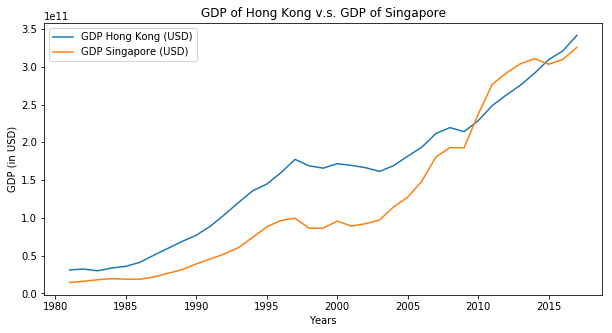

In [37]:
df_GDP.index = df_GDP.index.map(int)
df_GDP.plot(kind='line', figsize=(10,5))
plt.title('GDP of Hong Kong v.s. GDP of Singapore')
plt.ylabel('GDP (in USD)')
plt.xlabel('Years')

plt.savefig('./GDP_HK_Singap_inUSD.jpg', dpi=300)
plt.show()
plt.close()

We can see that the GDP of Hong Kong and Singapore are quite comparable, with Singapore catching up around 2010. 

### Fitting the GDP

It can be interesting to fit the GDP data in order to know how quickly an economy is evolving in time. As an example, we fit the GDP in USD of Hong Kong.

In [38]:
df_GDP.reset_index(inplace=True)
df_GDP.head()

,Year,GDP Hong Kong (USD),GDP Singapore (USD)
0,2017,3.415801e+11,3.256069e+11
1,2016,3.208983e+11,3.095995e+11
2,2015,3.093803e+11,3.032705e+11
3,2014,2.914064e+11,3.107282e+11
4,2013,2.756744e+11,3.039382e+11


In [39]:
x = df_GDP['Year']
y = df_GDP['GDP Hong Kong (USD)']
fit = np.polyfit(x,y,deg=2)
fit

array([ 4.92763511e+07, -1.88883255e+11,  1.80822090e+14])

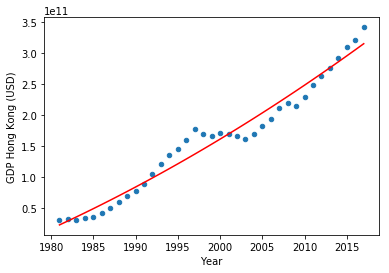

In [40]:
df_GDP.plot(kind='scatter', x='Year', y='GDP Hong Kong (USD)')
plt.plot(x, fit[0]*x*x + fit[1]*x + fit[2], color='red')
plt.savefig('./HK-GDP-fit.jpg', dpi=300)
plt.show()

We use regplot from seaborn to show explicitly that there is a correlation between the two economies GDPs. The fit here is a linear regression.

(0, 386652346536.27826)


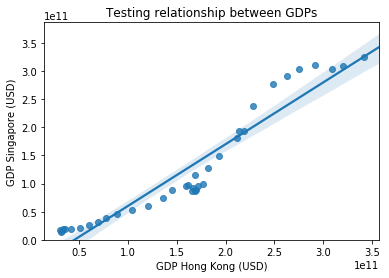

In [41]:
sns_plot = sns.regplot(x='GDP Hong Kong (USD)', y='GDP Singapore (USD)', data=df_GDP).set_title('Testing relationship between GDPs')
fig = sns_plot.get_figure()
fig.savefig('./HK-GDP-SG-GDP.jpg')
print(plt.ylim(0,))

Let us also plot the residue (actually the difference) plot between Hong Kong and Singapore GDPs.

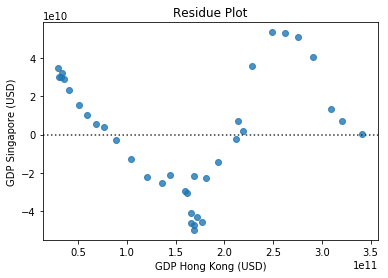

In [42]:
sns_plot = sns.residplot(df_GDP['GDP Hong Kong (USD)'],df_GDP['GDP Singapore (USD)']).set_title("Residue Plot")
fig = sns_plot.get_figure()
fig.savefig('./HK-GDP-SG-GDP_residue.jpg')

This clearly shows that there is a non-linear relationship in the difference between the 2 GDPs. One can wonder if we could fit one GDP as a variable depending on the other GDP. Let us see if that is possible by fitting Singapore's GDP in terms of Hong Kong's GDP, with a polynomial regression.

In [43]:
x = df_GDP['GDP Hong Kong (USD)']
y = df_GDP['GDP Singapore (USD)']
f = np.polyfit(x,y,deg=4)
pol = np.poly1d(f)
print(pol)

           4             3            2
-2.27e-34 x + 1.364e-22 x - 2.24e-11 x + 1.728 x - 1.988e+10


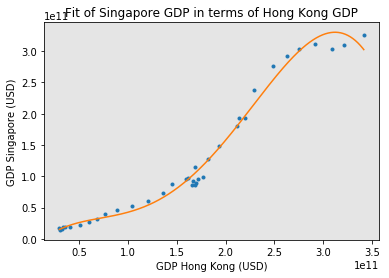

In [44]:
x_new = np.linspace(df_GDP['GDP Hong Kong (USD)'].min(), df_GDP['GDP Hong Kong (USD)'].max(), 1000)
y_new = pol(x_new)

plt.plot(x, y, '.', x_new, y_new, '-')
plt.title('Fit of Singapore GDP in terms of Hong Kong GDP')
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('GDP Hong Kong (USD)')
plt.ylabel('GDP Singapore (USD)')

plt.savefig('./HK-GDP-SG-GDP_PolyFit', dpi=300)
plt.show()
plt.close()

The residue of the fit is the following:

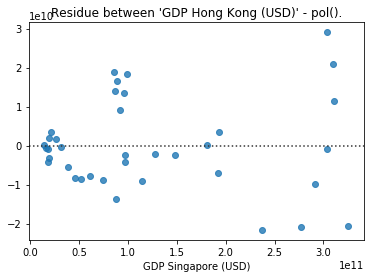

In [45]:
sns_plot = sns.residplot(y,pol(x)).set_title("Residue between 'GDP Hong Kong (USD)' - pol().")
fig = sns_plot.get_figure()
fig.savefig('./HK-GDP-SG-GDP_PolyFitResidue', dpi=300)

In [46]:
print('The R-square value is: ', r2_score(y, pol(x)))

The R-square value is:  0.9868190864488355


In [47]:
print('The Means Square Error value is: ', mean_squared_error(x, pol(x)))

The Means Square Error value is:  2.0284221318683403e+21


Despite the large value for the MSE which directly comes from the fact that we are dealing with variations of GDP of the order of 1e10 and 1e11 (see the residue plot), it is actually a very good fit as shown by the R value.

**Important notice:** even though it is interesting visually, the relation GDP_Singa = func(GDP_HK) does not have much interest in practice. Indeed, this relation show a positive correlation simply because both GDPs grow simultaneously. This happens for reasons which are not revealed here and which are probably similar in both economies, but one cannot say that one GDP directly depends on another (there is correlation without causation), hence this relation would not be very useful in practice to estimate one GDP from the other at a certain time in the past.

### Plotting the Expenditures

Our data frames also contain data on household consumption and general government expenditures. We thus plot them into an area plot. For more details about their meaning, please consult the initial source of the data:
    http://data.un.org/Data.aspx?q=GDP+by+Type+of+Expenditure+at+current+prices+&d=SNAAMA&f=grID%3a101%3bcurrID%3aNCU%3bpcFlag%3a0

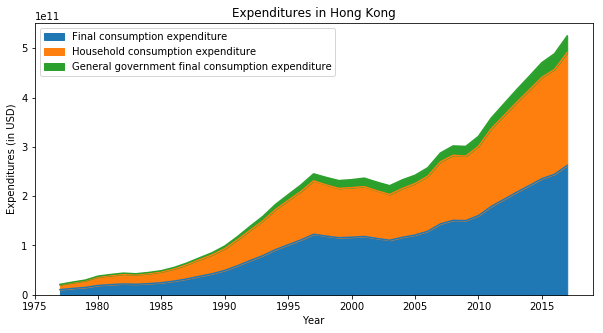

In [48]:
df_HK_sorted = df_HK.sort_values(by='Year', axis=0, ascending=True)
df_HK_sorted.head()
df_HK_expend = df_HK_sorted[['Year','Final consumption expenditure','Household consumption expenditure','General government final consumption expenditure']]
df_HK_expend.set_index('Year', inplace=True)

df_HK_expend.plot(kind='area', figsize=(10,5))
plt.title('Expenditures in Hong Kong')
plt.ylabel('Expenditures (in USD)')
plt.xlabel('Year')
plt.savefig('./HK-Expenditures.jpg', dpi=300)
plt.show()
plt.close()

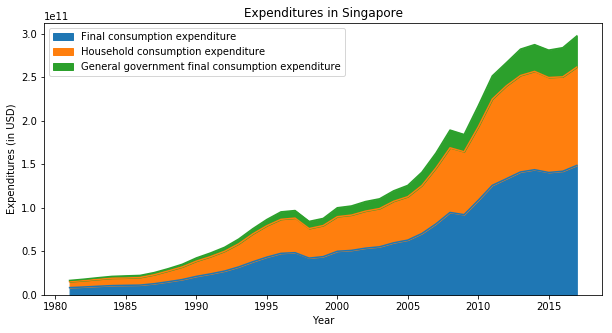

In [49]:
df_SG_sorted = df_SG.sort_values(by='Year', axis=0, ascending=True)
df_SG_sorted.head()
df_SG_expend = df_SG_sorted[['Year','Final consumption expenditure','Household consumption expenditure','General government final consumption expenditure']]
df_SG_expend.set_index('Year', inplace=True)

df_SG_expend.plot(kind='area', figsize=(10,5))
plt.title('Expenditures in Singapore')
plt.ylabel('Expenditures (in USD)')
plt.xlabel('Year')
plt.savefig('./SG-Expenditures.jpg', dpi=300)
plt.show()
plt.close()

Looking at these profiles, we can see that they both follow the trend of their respective GDPs.

## 1.4 - Consumer Price Index (CPI) <a id="14"></a>

We import the consumer price index (see definition after) for Singapore from the following official webpage: https://www.tablebuilder.singstat.gov.sg/publicfacing/createDataTable.action?refId=6771



In [50]:
tmp = pd.read_csv('./CPI-Singapore-Cleared.csv')
tmp.drop('Unnamed: 27', axis=1, inplace=True)
CPI_SG = tmp.T
CPI_SG.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
Variables,All Items - Lowest 20%,Food,Clothing & Footwear,Housing & Utilities,Household Durables And Services,Health Care,Transport,Communication,Recreation & Culture,Education,...,Food,Clothing & Footwear,Housing & Utilities,Household Durables And Services,Health Care,Transport,Communication,Recreation & Culture,Education,Miscellaneous Goods & Services
1993,62.805,65.668,91.582,53.342,88.073,56.15,65.687,108.065,99.712,49.397,...,65.49,90.611,67.696,82.719,60.22,78.165,138.038,88.583,46.787,76.91
1994,64.303,68.011,93.522,53.77,88.582,57.795,66.815,109.112,102.49,51.753,...,67.907,93.043,69.335,83.514,62.155,91.61,136.81,89.136,48.089,78.515
1995,65.461,69.506,94.627,54.254,90.712,58.574,67.987,108.792,105.682,54.101,...,69.535,94.53,70.238,87.56,63.046,90.997,130.318,89.432,49.865,79.157
1996,66.522,71.05,95.107,54.655,90.527,59.871,69.176,108.388,107.299,56.369,...,70.874,94.749,71.109,88.04,64.208,90.159,129.119,90.338,52.482,79.624


In [51]:
CPI_SG.shape

(27, 33)

Getting nice column names:

In [52]:
columns_list = []
for i in range(CPI_SG.shape[1]):
    split = CPI_SG.iloc[0,i].split(' ')
    new_word = ''
    for j in split:
        if j != '':
            new_word += j + ' '
    new_word = new_word[:-1]
    columns_list.append(new_word)
columns_list

['All Items - Lowest 20%',
 'Food',
 'Clothing & Footwear',
 'Housing & Utilities',
 'Household Durables And Services',
 'Health Care',
 'Transport',
 'Communication',
 'Recreation & Culture',
 'Education',
 'Miscellaneous Goods & Services',
 'All Items - Middle 60%',
 'Food',
 'Clothing & Footwear',
 'Housing & Utilities',
 'Household Durables And Services',
 'Health Care',
 'Transport',
 'Communication',
 'Recreation & Culture',
 'Education',
 'Miscellaneous Goods & Services',
 'All Items - Highest 20%',
 'Food',
 'Clothing & Footwear',
 'Housing & Utilities',
 'Household Durables And Services',
 'Health Care',
 'Transport',
 'Communication',
 'Recreation & Culture',
 'Education',
 'Miscellaneous Goods & Services']

In [53]:
CPI_SG.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
Variables,All Items - Lowest 20%,Food,Clothing & Footwear,Housing & Utilities,Household Durables And Services,Health Care,Transport,Communication,Recreation & Culture,Education,...,Food,Clothing & Footwear,Housing & Utilities,Household Durables And Services,Health Care,Transport,Communication,Recreation & Culture,Education,Miscellaneous Goods & Services
1993,62.805,65.668,91.582,53.342,88.073,56.15,65.687,108.065,99.712,49.397,...,65.49,90.611,67.696,82.719,60.22,78.165,138.038,88.583,46.787,76.91
1994,64.303,68.011,93.522,53.77,88.582,57.795,66.815,109.112,102.49,51.753,...,67.907,93.043,69.335,83.514,62.155,91.61,136.81,89.136,48.089,78.515
1995,65.461,69.506,94.627,54.254,90.712,58.574,67.987,108.792,105.682,54.101,...,69.535,94.53,70.238,87.56,63.046,90.997,130.318,89.432,49.865,79.157
1996,66.522,71.05,95.107,54.655,90.527,59.871,69.176,108.388,107.299,56.369,...,70.874,94.749,71.109,88.04,64.208,90.159,129.119,90.338,52.482,79.624


In [54]:
CPI_SG.drop(CPI_SG.index[0], inplace=True)

In [55]:
CPI_SG.columns = columns_list
CPI_SG.head()

,All Items - Lowest 20%,Food,Clothing & Footwear,Housing & Utilities,Household Durables And Services,Health Care,Transport,Communication,Recreation & Culture,Education,...,Food,Clothing & Footwear,Housing & Utilities,Household Durables And Services,Health Care,Transport,Communication,Recreation & Culture,Education,Miscellaneous Goods & Services
1993,62.805,65.668,91.582,53.342,88.073,56.15,65.687,108.065,99.712,49.397,...,65.49,90.611,67.696,82.719,60.22,78.165,138.038,88.583,46.787,76.91
1994,64.303,68.011,93.522,53.77,88.582,57.795,66.815,109.112,102.49,51.753,...,67.907,93.043,69.335,83.514,62.155,91.61,136.81,89.136,48.089,78.515
1995,65.461,69.506,94.627,54.254,90.712,58.574,67.987,108.792,105.682,54.101,...,69.535,94.53,70.238,87.56,63.046,90.997,130.318,89.432,49.865,79.157
1996,66.522,71.05,95.107,54.655,90.527,59.871,69.176,108.388,107.299,56.369,...,70.874,94.749,71.109,88.04,64.208,90.159,129.119,90.338,52.482,79.624
1997,67.768,72.512,96.015,55.578,89.938,62.092,72.077,107.443,106.582,57.239,...,72.357,95.6,74.656,87.979,66.037,96.53,124.603,89.349,54.244,80.034


Let us plot some of the Consumer Price Indices:

In [56]:
CPI_SG_reduced = CPI_SG[['All Items - Lowest 20%','All Items - Middle 60%','All Items - Highest 20%']]
CPI_SG_reduced.head()

,All Items - Lowest 20%,All Items - Middle 60%,All Items - Highest 20%
1993,62.805,68.194,73.424
1994,64.303,69.915,78.153
1995,65.461,71.23,78.963
1996,66.522,72.326,79.521
1997,67.768,73.561,82.173


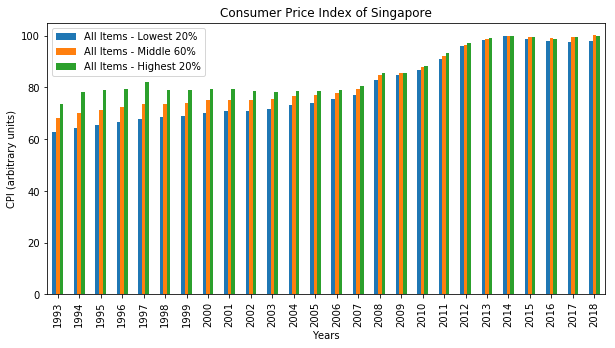

In [57]:
CPI_SG_reduced.index = CPI_SG_reduced.index.map(int)
CPI_SG_reduced.plot(kind='bar', figsize=(10, 5))
plt.title('Consumer Price Index of Singapore')
plt.ylabel('CPI (arbitrary units)')
plt.xlabel('Years')
plt.savefig('./SG-CPI-Allitems.jpg', dpi=300)
plt.show()
plt.close()

We can also plot the values of different categories of goods that we will be able to compare with Hong Kong after.

In [58]:
tmp = CPI_SG[['Food','Housing & Utilities','Clothing & Footwear','Household Durables And Services','Transport']]
tmp.columns = ['Food Lowest 20%','Food Middle 60%','Food Highest 20%',
                           'Housing & Utilities Lowest 20%','Housing & Utilities Middle 60%','Housing & Utilities Highest 20%',
                           'Clothing & Footwear Lowest 20%','Clothing & Footwear Middle 60%','Clothing & Footwear Highest 20%',
                           'Household Durables And Services Lowest 20%','Household Durables And Services Middle 60%','Household Durables And Services Highest 20%',
                           'Transport Lowest 20%','Transport Middle 60%','Transport Highest 20%']
CPI_SG_reduced2 = tmp[['Food Middle 60%','Housing & Utilities Middle 60%','Clothing & Footwear Middle 60%','Household Durables And Services Middle 60%','Transport Middle 60%']]
CPI_SG_reduced2.head()

,Food Middle 60%,Housing & Utilities Middle 60%,Clothing & Footwear Middle 60%,Household Durables And Services Middle 60%,Transport Middle 60%
1993,66.083,56.57,92.605,82.656,71.011
1994,68.422,57.187,94.762,83.424,73.557
1995,69.979,57.732,96.191,87.018,75.038
1996,71.486,58.239,96.729,87.548,75.989
1997,72.948,59.515,97.511,87.415,78.509


In [59]:
CPI_SG_reduced2 = CPI_SG_reduced2.astype('float64')

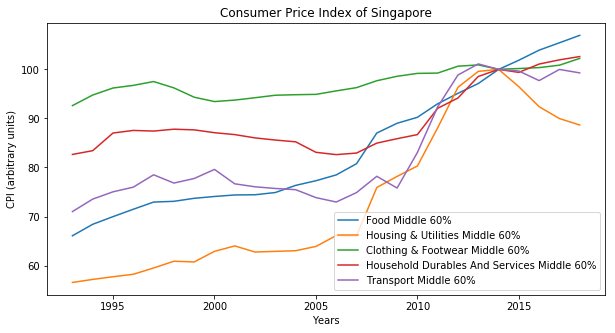

In [60]:
CPI_SG_reduced2.index = CPI_SG_reduced2.index.map(int)
CPI_SG_reduced2.plot(kind='line', figsize=(10, 5))
plt.title('Consumer Price Index of Singapore')
plt.ylabel('CPI (arbitrary units)')
plt.xlabel('Years')
plt.savefig('./SG-CPI-Categitems.jpg', dpi=300)
plt.show()
plt.close()

The CPI of Hong Kong is found on the following page: https://www.censtatd.gov.hk/hkstat/sub/sp270.jsp?productCode=D5600001

According to this webpage's definition:

> The Consumer Price Index (CPI) measures the changes over time in the price level of consumer goods and services generally purchased by households. The year-on-year rate of change in the CPI is widely used as an indicator of the inflation affecting consumers.

There are different types of CPIs, we use the composite one.

In [61]:
CPI_HK = pd.read_csv('./CPI-HongKong/D5600001B2019MM09B-E501-1-Cleared.CSV')
CPI_HK.head()

,Commodity/service section,Unnamed: 1,All items,All items.1,Food,Food.1,Meals bought away from home,Meals bought away from home.1,"Food, excluding meals bought away from home","Food, excluding meals bought away from home.1",...,Clothing and footwear,Clothing and footwear.1,Durable goods,Durable goods.1,Miscellaneous goods,Miscellaneous goods.1,Transport,Transport.1,Miscellaneous services,Miscellaneous services.1
0,Year,Month,Index,Year-on-year % change,Index,Year-on-year % change,Index,Year-on-year % change,Index,Year-on-year % change,...,Index,Year-on-year % change,Index,Year-on-year % change,Index,Year-on-year % change,Index,Year-on-year % change,Index,Year-on-year % change
1,1982,NaN,26.3,10.9,24.9,12.1,22.6,14.2,27.3,10.3,...,33.1,11.4,115.8,2.1,27.2,8.8,24.2,12.8,22.6,14.1
2,1983,NaN,28.9,10,27,8.6,24.4,8.1,29.7,9,...,35.1,6,122.7,6,30.2,11,27.5,13.8,25.3,12.2
3,1984,NaN,31.4,8.6,28.9,6.8,26.1,7.1,31.7,6.5,...,39.6,12.7,135.2,10.2,33.3,10.2,30.3,10.2,28.3,11.8
4,1985,NaN,32.5,3.5,29.1,0.7,26.9,3.2,31.2,-1.5,...,42.8,8.2,135.2,0,33.6,1,32,5.7,30.5,7.7


In [62]:
CPI_HK.drop(['Unnamed: 1'], axis=1, inplace=True)
CPI_HK.shape

(38, 25)

Let's merge the column names:

In [63]:
columns_list = []
for i in range(CPI_HK.shape[1]):
    split = (str(CPI_HK.columns[i]) + ' ' + str(CPI_HK.iloc[0,i])).split(' ')
    new_word = ''
    
    for j in split:
        if i==0:
            new_word = split[-1] + ' '
        else:
            new_word += j + ' '
    new_word = new_word[:-1]
    columns_list.append(new_word)
columns_list

['Year',
 'All items Index',
 'All items.1 Year-on-year % change',
 'Food Index',
 'Food.1 Year-on-year % change',
 'Meals bought away from home Index',
 'Meals bought away from home.1 Year-on-year % change',
 'Food, excluding meals bought away from home Index',
 'Food, excluding meals bought away from home.1 Year-on-year % change',
 'Housing Index',
 'Housing.1 Year-on-year % change',
 'Electricity, gas and water Index',
 'Electricity, gas and water.1 Year-on-year % change',
 'Alcoholic drinks and tobacco Index',
 'Alcoholic drinks and tobacco.1 Year-on-year % change',
 'Clothing and footwear Index',
 'Clothing and footwear.1 Year-on-year % change',
 'Durable goods Index',
 'Durable goods.1 Year-on-year % change',
 'Miscellaneous goods Index',
 'Miscellaneous goods.1 Year-on-year % change',
 'Transport Index',
 'Transport.1 Year-on-year % change',
 'Miscellaneous services Index',
 'Miscellaneous services.1 Year-on-year % change']

In [64]:
CPI_HK.drop(CPI_HK.index[0], inplace=True)

In [65]:
CPI_HK.columns = columns_list
CPI_HK.set_index('Year', inplace=True)
CPI_HK.head()

,All items Index,All items.1 Year-on-year % change,Food Index,Food.1 Year-on-year % change,Meals bought away from home Index,Meals bought away from home.1 Year-on-year % change,"Food, excluding meals bought away from home Index","Food, excluding meals bought away from home.1 Year-on-year % change",Housing Index,Housing.1 Year-on-year % change,...,Clothing and footwear Index,Clothing and footwear.1 Year-on-year % change,Durable goods Index,Durable goods.1 Year-on-year % change,Miscellaneous goods Index,Miscellaneous goods.1 Year-on-year % change,Transport Index,Transport.1 Year-on-year % change,Miscellaneous services Index,Miscellaneous services.1 Year-on-year % change
Year,,,,,,,,,,,,,,,,,,,,,
1982,26.3,10.9,24.9,12.1,22.6,14.2,27.3,10.3,22.2,11.2,...,33.1,11.4,115.8,2.1,27.2,8.8,24.2,12.8,22.6,14.1
1983,28.9,10,27,8.6,24.4,8.1,29.7,9,24.3,9.3,...,35.1,6,122.7,6,30.2,11,27.5,13.8,25.3,12.2
1984,31.4,8.6,28.9,6.8,26.1,7.1,31.7,6.5,26.1,7.7,...,39.6,12.7,135.2,10.2,33.3,10.2,30.3,10.2,28.3,11.8
1985,32.5,3.5,29.1,0.7,26.9,3.2,31.2,-1.5,27.6,5.6,...,42.8,8.2,135.2,0,33.6,1,32,5.7,30.5,7.7
1986,33.6,3.8,29.5,1.3,27.7,2.6,31.3,0.2,29.1,5.2,...,45.3,6.7,141.6,5.4,35.2,4.8,33.3,4.6,32.7,7.4


In [66]:
CPI_HK_reduced = CPI_HK[['Food Index','Housing Index','Clothing and footwear Index','Durable goods Index','Transport Index']]
CPI_HK_reduced.head()

,Food Index,Housing Index,Clothing and footwear Index,Durable goods Index,Transport Index
Year,,,,,
1982,24.9,22.2,33.1,115.8,24.2
1983,27,24.3,35.1,122.7,27.5
1984,28.9,26.1,39.6,135.2,30.3
1985,29.1,27.6,42.8,135.2,32
1986,29.5,29.1,45.3,141.6,33.3


In [67]:
CPI_HK_reduced = CPI_HK_reduced.astype('float64')
CPI_HK_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 1982 to 2018
Data columns (total 5 columns):
Food Index                     37 non-null float64
Housing Index                  37 non-null float64
Clothing and footwear Index    37 non-null float64
Durable goods Index            37 non-null float64
Transport Index                37 non-null float64
dtypes: float64(5)
memory usage: 1.7+ KB


We can now do a bar plot with the different indices (according to a specific category of goods):

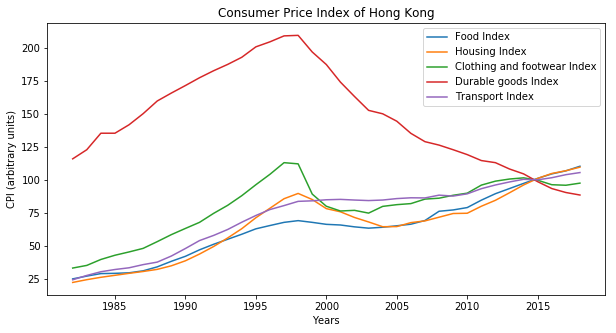

In [68]:
CPI_HK_reduced.index = CPI_HK_reduced.index.map(int)
CPI_HK_reduced.plot(kind='line', figsize=(10, 5))
plt.title('Consumer Price Index of Hong Kong')
plt.ylabel('CPI (arbitrary units)')
plt.xlabel('Years')
plt.savefig('./HG-CPI-Categitems.jpg', dpi=300)
plt.show()
plt.close()

And since having 5 indices on the same plot is a little bit difficult to read, let us add the box plot for these indices:

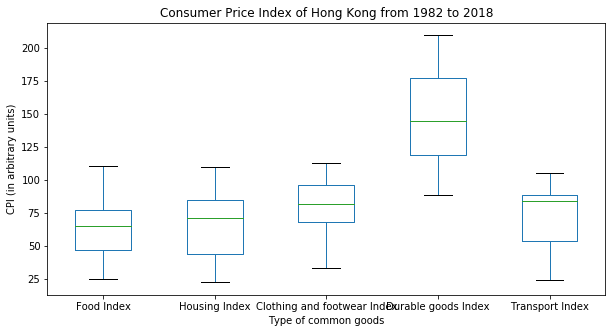

In [69]:
CPI_HK_reduced.plot(kind='box', figsize=(10,5))
plt.title('Consumer Price Index of Hong Kong from 1982 to 2018')
plt.ylabel('CPI (in arbitrary units)')
plt.xlabel('Type of common goods')
plt.savefig('./HG-CPI-Categitems-box.jpg', dpi=300)
plt.show()
plt.close()

As we can see, the durable goods have a much larger variation during this period 1982-2018 than the other types of items.

# 2 - COMPARISON ON DISTRICT VENUES <a id="2"></a>

## 2.1 - Singapore Districts <a id="21"></a>

I have build a csv file by taking the names of areas in districts 1 to 28 from https://www.iproperty.com.sg/resources/District_Guide.aspx# and used https://latitude.to/ to get their geolocalisation. A map of the districts can also be found on http://www.propertyhub.com.sg/singapore-district-guide.html (provided later into the notebook for comparison).

In [70]:
Dist_SG = pd.read_csv('./Singap_Districts.csv')
Dist_SG.head(20)

,District,Name,Latitude,Longitude
0,1,Raffles Place,1.28410,103.85133
1,1,Marina,1.28069,103.85430
2,1,Cecil,1.27948,103.84826
3,2,Tanjong Pagar,1.27803,103.84045
4,2,Chinatown,1.28149,103.84482
5,3,Tiong Bahru,1.28637,103.82530
6,3,Alexandra,1.28686,103.80509
7,3,Queenstown,1.29417,103.78613
8,4,Mount Faber,1.27122,103.81971
9,4,Telok Blangah,1.26915,103.81428


I suppress the place 'Bugis' because I could not find its location in latitude.to.

In [71]:
Dist_SG = Dist_SG[Dist_SG['Latitude'] != 0.]
Dist_SG.head(20)

,District,Name,Latitude,Longitude
0,1,Raffles Place,1.28410,103.85133
1,1,Marina,1.28069,103.85430
2,1,Cecil,1.27948,103.84826
3,2,Tanjong Pagar,1.27803,103.84045
4,2,Chinatown,1.28149,103.84482
5,3,Tiong Bahru,1.28637,103.82530
6,3,Alexandra,1.28686,103.80509
7,3,Queenstown,1.29417,103.78613
8,4,Mount Faber,1.27122,103.81971
9,4,Telok Blangah,1.26915,103.81428


Let us create a first map with all the centers of districts that we have built.

In [72]:
latitude_SG = 1.290270
longitude_SG = 103.851959

# creating the map
map_SG_1 = folium.Map(location=[latitude_SG, longitude_SG], zoom_start=11)

# adding markers
for lat, lng, district, name in zip(Dist_SG['Latitude'], Dist_SG['Longitude'], Dist_SG['District'], Dist_SG['Name']):
    label = 'District {} - Place: {}'.format(district, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SG_1)

In [73]:
map_SG_1

In [74]:
map_SG_1.save(outfile='./SG1-All_Neighborhoods.html')

Saved Map:

<img src="./SG1-All_Neighborhoods.png" width="800" height="600">

Let us aggregate columns and have one row per district. We concatenante the names together and take the mean of Latitude and Longitude within a district.

About the functions that can be used in .agg():
https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [75]:
Dist_SG_concat = Dist_SG.groupby('District').agg({'Name': lambda x: ', '.join(set(x.dropna())), 'Latitude':'mean', 'Longitude':'mean'})
Dist_SG_concat.reset_index(inplace=True)
Dist_SG_concat

,District,Name,Latitude,Longitude
0,1,"Cecil, Raffles Place, Marina",1.281423,103.851297
1,2,"Chinatown, Tanjong Pagar",1.279760,103.842635
2,3,"Alexandra, Queenstown, Tiong Bahru",1.289133,103.805507
3,4,"Telok Blangah, Harbourfront, Mount Faber",1.268620,103.819307
4,5,"Clementi, Pasir Panjang, Buona Vista",1.297257,103.778533
5,6,"Clarke Quay, City Hall",1.291650,103.848490
6,7,"Golden Mile, Beach Road",1.327250,103.860255
7,8,"Farrer Park, Little India",1.309225,103.851635
8,9,"Orchard Road, River Valley",1.298805,103.837070
9,10,"Bukit Timah, Holland, Balmoral",1.319277,103.811170


We plot the map with districts center circles having a radius of 1000 meters, for which we will run Foursquare venues search later.

In [76]:
RADIUS = 1000

# Re-creating the map
# Comment this line to check that average (red) points are the average of previous (blue) points
map_SG_2 = folium.Map(location=[latitude_SG, longitude_SG], zoom_start=11) 

# adding the new markers to the map for comparision
for lat, lng, district, name in zip(Dist_SG_concat['Latitude'], Dist_SG_concat['Longitude'], Dist_SG_concat['District'], Dist_SG_concat['Name']):
    label = 'District {} - Places: {}'.format(district, name)
    label = folium.Popup(label, parse_html=True)
    folium.Circle( # We use Circle instead of CircleMarker so that the radius is fixed and in meters unit
        [lat, lng],
        radius=RADIUS,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SG_2)

map_SG_2

In [77]:
map_SG_2.save(outfile='./SG2-All_Districts.html')

Saved Map:

<img src="./SG2-All_Districts.png" width="800" height="600">

We can see that these circles correspond quite well to the centers of the districts as shown in the following map:
    
<img src="http://www.propertyhub.com.sg/images/M_images/singapore_district_map.jpg" alt="Simply Easy Learning" width="800" height="600">

## 2.2 - Hong Kong Cities and Districts <a id="22"></a>

### Cities of Hong Kong

To get the data of Hong Kong cities names and locations, we will scrape the following HTML page where data is already available:
https://www.geodatos.net/en/coordinates/hong-kong

In [78]:
source = requests.get('https://www.geodatos.net/en/coordinates/hong-kong').text
soup = BeautifulSoup(source, 'lxml') # We use the lxml parser

We get the second table into the page:

In [79]:
table_on_page = soup.findAll('table', class_='table table-responsive table-striped table-hover')[1] # Select second table
print(table_on_page.prettify())

<table class="table table-responsive table-striped table-hover">
 <thead>
  <tr>
   <th>
    City
   </th>
   <th>
    Coordinates
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    Hong Kong
   </td>
   <td>
    <a href="https://www.geodatos.net/en/coordinates/hong-kong/central-and-western/hong-kong">
     22.2783203, 114.1746902
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Kowloon
   </td>
   <td>
    <a href="https://www.geodatos.net/en/coordinates/hong-kong/kowloon-city/kowloon">
     22.3166695, 114.1833267
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Tsuen Wan
   </td>
   <td>
    <a href="https://www.geodatos.net/en/coordinates/hong-kong/tsuen-wan">
     22.3706608, 114.1047897
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Yuen Long Kau Hui
   </td>
   <td>
    <a href="https://www.geodatos.net/en/coordinates/hong-kong/yuen-long/yuen-long-kau-hui">
     22.4500008, 114.0333328
    </a>
   </td>
  </tr>
  <tr>
   <td>
    Tung Chung
   </td>
   <td>
    <a href="https://www.ge

And we select all the values in <td> tags to build up a list:

In [80]:
values_td = []
for val in table_on_page.find_all('td'):
    values_td.append(val.text)
values_td

['Hong Kong',
 '22.2783203, 114.1746902',
 'Kowloon',
 '22.3166695, 114.1833267',
 'Tsuen Wan',
 '22.3706608, 114.1047897',
 'Yuen Long Kau Hui',
 '22.4500008, 114.0333328',
 'Tung Chung',
 '22.2878304, 113.9424286',
 'Sha Tin',
 '22.3833294, 114.1833267',
 'Tuen Mun',
 '22.3917503, 113.9715729',
 'Tai Po',
 '22.4500694, 114.1687698',
 'Sai Kung',
 '22.3833294, 114.2666702',
 'Yung Shue Wan',
 '22.2262306, 114.1124115',
 'Ngong Ping',
 '22.2555599, 113.9039078',
 'Sok Kwu Wan',
 '22.2045307, 114.1315918',
 'Tai O',
 '22.2551498, 113.8630905',
 'Wong Tai Sin',
 '22.3500004, 114.1833267',
 'Wan Chai',
 '22.2814198, 114.1725769',
 'Sham Shui Po',
 '22.3302307, 114.1594467',
 'Central',
 '22.2829895, 114.1584625']

Create a new data frame:

In [81]:
Cities_HK = pd.DataFrame(columns=['City Name','Latitude','Longitude'])
Cities_HK.head()

,City Name,Latitude,Longitude


And fill it with values from the list:

In [82]:
for i in range(0,len(values_td)-1,2):
    tmp = values_td[i+1].split(sep=', ')
    Cities_HK = Cities_HK.append({'City Name':values_td[i],'Latitude':tmp[0],'Longitude':tmp[1]}, ignore_index=True)

Cities_HK

,City Name,Latitude,Longitude
0,Hong Kong,22.2783203,114.1746902
1,Kowloon,22.3166695,114.1833267
2,Tsuen Wan,22.3706608,114.1047897
3,Yuen Long Kau Hui,22.4500008,114.0333328
4,Tung Chung,22.2878304,113.9424286
5,Sha Tin,22.3833294,114.1833267
6,Tuen Mun,22.3917503,113.9715729
7,Tai Po,22.4500694,114.1687698
8,Sai Kung,22.3833294,114.2666702
9,Yung Shue Wan,22.2262306,114.1124115


In [83]:
Cities_HK.to_csv(r'./HK_Cities.csv')

Let us plot of map of theses cities locations:

In [84]:
latitude_HK = 22.3964272
longitude_HK = 114.1094971

# creating the map
map_HK_1 = folium.Map(location=[latitude_HK, longitude_HK], zoom_start=11)

# adding markers
for lat, lng, district in zip(Cities_HK['Latitude'], Cities_HK['Longitude'], Cities_HK['City Name']):
    label = 'District: {}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HK_1)

In [85]:
map_HK_1

In [86]:
map_HK_1.save(outfile='./HK1-All_Cities.html')

Saved Map:

<img src="./HK1-All_Cities.png" width="800" height="600">

### Districts of Hong Kong

Exactly as done for Singapore, we also build a csv file by hand having the locations of Hong Kong Districts. The values are obtained from the names of districts in https://en.wikipedia.org/wiki/Districts_of_Hong_Kong and we used https://latitude.to/ to get their geolocalisation.

In [87]:
Dist_HK = pd.read_csv('./HK_Districts.csv')
Dist_HK.head()

,District Name,Latitude,Longitude
0,Central and Western,22.27302,114.14988
1,Eastern,22.27339,114.23608
2,Southern,22.24322,114.19744
3,Wan Chai,22.27602,114.17515
4,Sham Shui Po,22.32859,114.16028


Let us plot these District centers on top of the previous map to see where they are located.

In [88]:
latitude_HK = 22.3964272
longitude_HK = 114.1094971

# adding markers
for lat, lng, district in zip(Dist_HK['Latitude'], Dist_HK['Longitude'], Dist_HK['District Name']):
    label = 'District: {}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HK_1)

In [89]:
map_HK_1

In [90]:
map_HK_1.save(outfile='./HK2-Cities_and_Districts.html')

Saved Map:

<img src="./HK2-Cities_and_Districts.png" width="800" height="600">

From Wikipedia, we can see the correspondence between these red points and the center if districts:
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Density_of_Hong_Kong_by_Districts.svg/1280px-Density_of_Hong_Kong_by_Districts.svg.png" alt="Simply Easy Learning" width="800" height="600">

We now plot the map with districts center circles having a radius of 1000 meters, for which we will run Foursquare venues search.

In [91]:
latitude_HK = 22.3964272
longitude_HK = 114.1094971

# re-creating the map
map_HK_2 = folium.Map(location=[latitude_HK, longitude_HK], zoom_start=11)

# adding markers
for lat, lng, district in zip(Dist_HK['Latitude'], Dist_HK['Longitude'], Dist_HK['District Name']):
    label = 'District: {}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=RADIUS,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HK_2)

In [92]:
map_HK_2

In [93]:
map_HK_2.save(outfile='./HK3-Districts.html')

Saved Map:

<img src="./HK3-Districts.png" width="800" height="600">

## 2.3 - Singapore Venues <a id="23"></a>

We borrow a function from the course that will download all the venues around a certain location within a radius RADIUS and a limit of venues LIMIT. We slightly modify it so that it display the percentage of progress.

In [94]:
def getNearbyVenues(names, latitudes, longitudes, radius, limit):
    N = len(names)
    counter = 1
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # Printing status of execution
        clear_output(wait=True)
        display("Running... " + str(int(counter/N*100)) + '%')
        counter +=1
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

And we apply it first to Singapore:

In [95]:
Dist_SG_concat.head()

,District,Name,Latitude,Longitude
0,1,"Cecil, Raffles Place, Marina",1.281423,103.851297
1,2,"Chinatown, Tanjong Pagar",1.279760,103.842635
2,3,"Alexandra, Queenstown, Tiong Bahru",1.289133,103.805507
3,4,"Telok Blangah, Harbourfront, Mount Faber",1.268620,103.819307
4,5,"Clementi, Pasir Panjang, Buona Vista",1.297257,103.778533


In [96]:
Dist_SG.head()

,District,Name,Latitude,Longitude
0,1,Raffles Place,1.28410,103.85133
1,1,Marina,1.28069,103.85430
2,1,Cecil,1.27948,103.84826
3,2,Tanjong Pagar,1.27803,103.84045
4,2,Chinatown,1.28149,103.84482


To keep notations simple, we change the name of Dist_SG_concat to Dist_SG (it is Dist_SG_concat which contains district centers, so it is the data frame we want to work with):

In [97]:
Dist_SG = Dist_SG_concat

We look for venues in the districts centers surroundings:

In [98]:
LIMIT = 100

########## GET VENUES FROM FOURSQUARE ##########

# Venues_SG = getNearbyVenues(names=Dist_SG['District'], latitudes=Dist_SG['Latitude'], longitudes=Dist_SG['Longitude'], radius=RADIUS, limit=LIMIT)

In [99]:
########## SAVING THESE VENUES ##########

### Venues_SG.to_csv(r'./Venues_SG_1.csv')

In [100]:
########## LOADING VENUES FROM SAVED CSV ##########

Venues_SG = pd.read_csv('./Venues_SG_1.csv')

In [101]:
print(Venues_SG.shape)
Venues_SG.head()

(1770, 8)


,Unnamed: 0,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,1,1.281423,103.851297,Lau Pa Sat Satay Street,1.280286,103.850655,Street Food Gathering
1,1,1,1.281423,103.851297,SOS,1.279996,103.852925,Pub
2,2,1,1.281423,103.851297,Grain Traders,1.281468,103.850039,Restaurant
3,3,1,1.281423,103.851297,Lau Pa Sat Festival Market,1.280582,103.850440,Food Court
4,4,1,1.281423,103.851297,Sofitel So Singapore,1.280124,103.849867,Hotel


In [102]:
Venues_SG.groupby('Neighbourhood').count()

,Unnamed: 0,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,
1,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100
3,89,89,89,89,89,89,89
4,100,100,100,100,100,100,100
5,63,63,63,63,63,63,63
6,100,100,100,100,100,100,100
7,75,75,75,75,75,75,75
8,100,100,100,100,100,100,100
9,100,100,100,100,100,100,100


In [103]:
print('There are {} uniques categories.'.format(len(Venues_SG['Venue Category'].unique())))

There are 231 uniques categories.


Let's do a one-hot encoding of the "Venue Category" so that we can use the k-means clustering method after:

In [104]:
SG_onehot = pd.get_dummies(Venues_SG[['Venue Category']], prefix="", prefix_sep="")
SG_onehot['District'] = Venues_SG['Neighbourhood']
fixed_columns = [SG_onehot.columns[-1]] + list(SG_onehot.columns[:-1])
SG_onehot = SG_onehot[fixed_columns]

SG_onehot.head()

,District,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
SG_onehot.shape

(1770, 232)

We group the venues by distric in order to build their frequency data frame:

In [106]:
SG_grouped = SG_onehot.groupby('District').mean().reset_index()
SG_grouped.head()

,District,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,1,0.0,0.000000,0.01,0.000000,0.0,0.0,0.020000,0.0,0.00,...,0.0,0.000000,0.010000,0.03,0.0,0.04,0.0,0.0,0.00,0.02
1,2,0.0,0.000000,0.00,0.010000,0.0,0.0,0.030000,0.0,0.02,...,0.0,0.000000,0.000000,0.00,0.0,0.01,0.0,0.0,0.00,0.01
2,3,0.0,0.011236,0.00,0.000000,0.0,0.0,0.033708,0.0,0.00,...,0.0,0.011236,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.00
3,4,0.0,0.000000,0.00,0.000000,0.0,0.0,0.020000,0.0,0.00,...,0.0,0.000000,0.010000,0.01,0.0,0.01,0.0,0.0,0.01,0.01
4,5,0.0,0.000000,0.00,0.015873,0.0,0.0,0.031746,0.0,0.00,...,0.0,0.000000,0.015873,0.00,0.0,0.00,0.0,0.0,0.00,0.00


In [107]:
SG_grouped.shape

(28, 232)

In [108]:
Dist_SG.head()

,District,Name,Latitude,Longitude
0,1,"Cecil, Raffles Place, Marina",1.281423,103.851297
1,2,"Chinatown, Tanjong Pagar",1.279760,103.842635
2,3,"Alexandra, Queenstown, Tiong Bahru",1.289133,103.805507
3,4,"Telok Blangah, Harbourfront, Mount Faber",1.268620,103.819307
4,5,"Clementi, Pasir Panjang, Buona Vista",1.297257,103.778533


Some **tests** here.

<!--
# Test:
temp = Singap_grouped[Singap_grouped['Neighbourhood'] == 1].T.reset_index()
temp.columns = ['venue','freq']
temp = temp.iloc[1:]
temp = temp.round({'freq': 2})
description = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
description

# Test:
descripline = ''
for i in range(len(description)):
    descripline += description.iloc[i,0] + ' (' + str(description.iloc[i,1]) + ') - '
print(descripline)

-->

Let us plot the map of Singapore and display in a popup for each district center the 5 most frequent venues:

In [109]:
num_top_venues = 5

# Re-creating the map
map_SG_3 = folium.Map(location=[latitude_SG, longitude_SG], zoom_start=11) 

# adding the new markers to the map for comparision
for lat, lng, district in zip(Dist_SG['Latitude'], Dist_SG['Longitude'], Dist_SG['District']):
    
    # Creating a table for the most frequent venues for a given district
    temp = SG_grouped[SG_grouped['District'] == district].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 3})
    description = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    
    # Converting it to a string of venues
    descripline = ''
    for i in range(num_top_venues):
        descripline += str(round(description.iloc[i,1]*100.,3)) + '% ' + description.iloc[i,0] + ' <br> '
    
    # creating the label and the popup marker
    label = '<b>DISTRICT {}</b>: <br> {}'.format(district,descripline)
    label = folium.Popup(label, parse_html=False, max_width=150, min_width=150)
    folium.Circle([lat, lng], radius=RADIUS, popup=label, color='red', fill=True,
                  fill_color='#3186cc', fill_opacity=0.7, parse_html=False).add_to(map_SG_3)

In [110]:
map_SG_3

In [111]:
map_SG_3.save(outfile='./SG3-Districts_5venues.html')

Saved Map:

<img src="./SG3-Districts_5venues.png" width="800" height="600">

Let's proceed to the interpretation of data through clustering.

Function to return the most common venues:

In [112]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

We create the data frame and display the top 10 venues of each neighbourhood.

In [113]:
def top_venues_sorted(df_grouped, neighborhood, num_top_venues):
    indicators = ['st', 'nd', 'rd']
    
    # create columns according to number of top venues
    columns = [neighborhood]
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted[neighborhood] = df_grouped[neighborhood]

    for ind in np.arange(df_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

    return neighborhoods_venues_sorted

Let's apply that function to Singapore:

In [114]:
num_top_venues = 5
SG_venues_sorted = top_venues_sorted(SG_grouped, 'District', num_top_venues)
SG_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Café,Hotel,Japanese Restaurant,Cocktail Bar,Wine Bar
1,2,Coffee Shop,Japanese Restaurant,Cocktail Bar,Café,Hotel
2,3,Chinese Restaurant,Food Court,Café,Coffee Shop,Bakery
3,4,Chinese Restaurant,Clothing Store,Fast Food Restaurant,Café,Toy / Game Store
4,5,Bus Station,Coffee Shop,Food Court,Café,Korean Restaurant
5,6,Hotel,Japanese Restaurant,Cocktail Bar,Café,Yoga Studio
6,7,Chinese Restaurant,Noodle House,Coffee Shop,Asian Restaurant,Fast Food Restaurant
7,8,Indian Restaurant,Café,Chinese Restaurant,Hotel,Vegetarian / Vegan Restaurant
8,9,Shopping Mall,Japanese Restaurant,Clothing Store,Hotel,Boutique
9,10,Café,Garden,Bakery,Shopping Mall,Noodle House


Running the *k*-means method to cluster the districts into 3 clusters.

In [115]:
# set number of clusters
kclusters = 3
SG_grouped_clustering = SG_grouped.drop('District', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SG_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [116]:
SG_grouped.head()

,District,Accessories Store,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,1,0.0,0.000000,0.01,0.000000,0.0,0.0,0.020000,0.0,0.00,...,0.0,0.000000,0.010000,0.03,0.0,0.04,0.0,0.0,0.00,0.02
1,2,0.0,0.000000,0.00,0.010000,0.0,0.0,0.030000,0.0,0.02,...,0.0,0.000000,0.000000,0.00,0.0,0.01,0.0,0.0,0.00,0.01
2,3,0.0,0.011236,0.00,0.000000,0.0,0.0,0.033708,0.0,0.00,...,0.0,0.011236,0.000000,0.00,0.0,0.00,0.0,0.0,0.00,0.00
3,4,0.0,0.000000,0.00,0.000000,0.0,0.0,0.020000,0.0,0.00,...,0.0,0.000000,0.010000,0.01,0.0,0.01,0.0,0.0,0.01,0.01
4,5,0.0,0.000000,0.00,0.015873,0.0,0.0,0.031746,0.0,0.00,...,0.0,0.000000,0.015873,0.00,0.0,0.00,0.0,0.0,0.00,0.00


Creating a new data frame that includes the cluster category as well as the top 10 venues.

In [117]:
# add clustering labels
SG_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SG_merged = Dist_SG_concat.copy()
SG_merged = SG_merged.join(SG_venues_sorted.set_index('District'), on='District')
SG_merged.head(10)

,District,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,"Cecil, Raffles Place, Marina",1.281423,103.851297,1,Café,Hotel,Japanese Restaurant,Cocktail Bar,Wine Bar
1,2,"Chinatown, Tanjong Pagar",1.279760,103.842635,1,Coffee Shop,Japanese Restaurant,Cocktail Bar,Café,Hotel
2,3,"Alexandra, Queenstown, Tiong Bahru",1.289133,103.805507,1,Chinese Restaurant,Food Court,Café,Coffee Shop,Bakery
3,4,"Telok Blangah, Harbourfront, Mount Faber",1.268620,103.819307,1,Chinese Restaurant,Clothing Store,Fast Food Restaurant,Café,Toy / Game Store
4,5,"Clementi, Pasir Panjang, Buona Vista",1.297257,103.778533,1,Bus Station,Coffee Shop,Food Court,Café,Korean Restaurant
5,6,"Clarke Quay, City Hall",1.291650,103.848490,1,Hotel,Japanese Restaurant,Cocktail Bar,Café,Yoga Studio
6,7,"Golden Mile, Beach Road",1.327250,103.860255,1,Chinese Restaurant,Noodle House,Coffee Shop,Asian Restaurant,Fast Food Restaurant
7,8,"Farrer Park, Little India",1.309225,103.851635,1,Indian Restaurant,Café,Chinese Restaurant,Hotel,Vegetarian / Vegan Restaurant
8,9,"Orchard Road, River Valley",1.298805,103.837070,1,Shopping Mall,Japanese Restaurant,Clothing Store,Hotel,Boutique
9,10,"Bukit Timah, Holland, Balmoral",1.319277,103.811170,1,Café,Garden,Bakery,Shopping Mall,Noodle House


In [118]:
SG_merged['Cluster Labels'].isnull().sum(axis=0)

0

In [119]:
SG_merged.head()

,District,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,"Cecil, Raffles Place, Marina",1.281423,103.851297,1,Café,Hotel,Japanese Restaurant,Cocktail Bar,Wine Bar
1,2,"Chinatown, Tanjong Pagar",1.279760,103.842635,1,Coffee Shop,Japanese Restaurant,Cocktail Bar,Café,Hotel
2,3,"Alexandra, Queenstown, Tiong Bahru",1.289133,103.805507,1,Chinese Restaurant,Food Court,Café,Coffee Shop,Bakery
3,4,"Telok Blangah, Harbourfront, Mount Faber",1.268620,103.819307,1,Chinese Restaurant,Clothing Store,Fast Food Restaurant,Café,Toy / Game Store
4,5,"Clementi, Pasir Panjang, Buona Vista",1.297257,103.778533,1,Bus Station,Coffee Shop,Food Court,Café,Korean Restaurant


In [120]:
SG_merged[['Cluster Labels']] = SG_merged[['Cluster Labels']].applymap(np.int64)

# create map
map_SG_4 = folium.Map(location=[latitude_SG, longitude_SG], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
    
# add markers to the map
markers_colors = []
for i, lat, lon, poi, cluster in zip(SG_merged.index, SG_merged['Latitude'], SG_merged['Longitude'], SG_merged['District'], SG_merged['Cluster Labels']):

    # Creating a string for the most frequent venues in a given district
    descripline = ''
    for j in range(num_top_venues):
        descripline += SG_merged.iloc[i,5+j] + ' <br> '
    
    label = '<b>DISTRICT {}:</b> <br> <b>cluster type {}</b> <br> {}'.format(district, cluster,descripline)
    label = folium.Popup(label, parse_html=False, max_width=150, min_width=150)
    folium.Circle(
        [lat, lon],
        radius=RADIUS,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_SG_4)

In [121]:
map_SG_4

In [122]:
map_SG_4.save(outfile='./SG4-Districts_clusters.html')

Saved Map:

<img src="./SG4-Districts_clusters.png" width="800" height="600">

We can see that the clustering from the unsupervised learning k-means method is interesting, but more data would bring more precision.

## 2.4 - Hong Kong Venues <a id="24"></a>

We just have to proceed in the same way to obtain the results for Hong Kong districts.

In [123]:
Dist_HK.head()

,District Name,Latitude,Longitude
0,Central and Western,22.27302,114.14988
1,Eastern,22.27339,114.23608
2,Southern,22.24322,114.19744
3,Wan Chai,22.27602,114.17515
4,Sham Shui Po,22.32859,114.16028


In [124]:
print(LIMIT)
print(RADIUS)

100
1000


In [125]:
########## GET VENUES FROM FOURSQUARE ##########

### Venues_HK = getNearbyVenues(names=Dist_HK['District Name'], latitudes=Dist_HK['Latitude'], longitudes=Dist_HK['Longitude'], radius=RADIUS, limit=LIMIT)

In [126]:
########## SAVING THESE VENUES ##########

### Venues_HK.to_csv(r'./Venues_HK_1.csv')

In [127]:
########## LOADING VENUES FROM SAVED CSV ##########

Venues_HK = pd.read_csv('./Venues_HK_1.csv')

In [128]:
print(Venues_HK.shape)
Venues_HK.head()

(1074, 8)


,Unnamed: 0,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Central and Western,22.27302,114.14988,Victoria Peak (太平山),22.271280,114.149976,Scenic Lookout
1,1,Central and Western,22.27302,114.14988,The Sky Terrace 428 (凌霄閣摩天臺428),22.271304,114.149991,Scenic Lookout
2,2,Central and Western,22.27302,114.14988,Madame Tussauds (杜莎夫人蠟像館),22.271400,114.149970,Art Gallery
3,3,Central and Western,22.27302,114.14988,The Peak Tower (凌霄閣),22.271307,114.149977,Shopping Mall
4,4,Central and Western,22.27302,114.14988,Hong Kong Trail (Section 1) 港島徑（第一段）,22.272874,114.145895,Trail


In [129]:
Venues_HK.groupby('Neighbourhood').count()

,Unnamed: 0,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,
Central and Western,64,64,64,64,64,64,64
Eastern,48,48,48,48,48,48,48
Islands,1,1,1,1,1,1,1
Kowloon City,98,98,98,98,98,98,98
Kwai Tsing,30,30,30,30,30,30,30
Kwun Tong,79,79,79,79,79,79,79
North,5,5,5,5,5,5,5
Sai Kung,58,58,58,58,58,58,58
Sha Tin,47,47,47,47,47,47,47


In [130]:
print('There are {} uniques categories.'.format(len(Venues_HK['Venue Category'].unique())))

There are 176 uniques categories.


In [131]:
HK_onehot = pd.get_dummies(Venues_HK[['Venue Category']], prefix="", prefix_sep="")
HK_onehot['District'] = Venues_HK['Neighbourhood']
fixed_columns = [HK_onehot.columns[-1]] + list(HK_onehot.columns[:-1])
HK_onehot = HK_onehot[fixed_columns]

HK_onehot.head()

,District,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,...,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central and Western,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central and Western,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
HK_onehot.shape

(1074, 177)

In [133]:
HK_grouped = HK_onehot.groupby('District').mean().reset_index()
HK_grouped

,District,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,...,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Central and Western,0.015625,0.031250,0.015625,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015625,0.015625,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,Eastern,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,Islands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Kowloon City,0.000000,0.010204,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020408,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Kwai Tsing,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,Kwun Tong,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.012658,0.000000,...,0.012658,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
7,Sai Kung,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,...,0.000000,0.000000,0.00,0.00,0.017241,0.000000,0.000000,0.000000,0.00,0.000000
8,Sha Tin,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Sham Shui Po,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.020000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


In [134]:
Dist_HK.head()

,District Name,Latitude,Longitude
0,Central and Western,22.27302,114.14988
1,Eastern,22.27339,114.23608
2,Southern,22.24322,114.19744
3,Wan Chai,22.27602,114.17515
4,Sham Shui Po,22.32859,114.16028


In [135]:
num_top_venues = 5

# Re-creating the map
map_HK_3 = folium.Map(location=[latitude_HK, longitude_HK], zoom_start=11) 

# adding the new markers to the map for comparision
for lat, lng, district in zip(Dist_HK['Latitude'], Dist_HK['Longitude'], Dist_HK['District Name']):
    
    # Creating a table for the most frequent venues for a given district
    temp = HK_grouped[HK_grouped['District'] == district].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 3})
    description = temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues)
    
    # Converting it to a string of venues
    descripline = ''
    for i in range(num_top_venues):
        descripline += str(round(description.iloc[i,1]*100,3)) + '% ' + description.iloc[i,0] + ' <br> '
    
    # creating the label and the popup marker
    label = '<b>DISTRICT {}</b>: <br> {}'.format(district,descripline)
    label = folium.Popup(label, parse_html=False, max_width=180, min_width=180)
    folium.Circle([lat, lng], radius=RADIUS, popup=label, color='red', fill=True,
                  fill_color='#3186cc', fill_opacity=0.7, parse_html=False).add_to(map_HK_3)

In [136]:
map_HK_3

In [137]:
map_HK_3.save(outfile='./HK4-Districts_5venues.html')

Saved Map:

<img src="./HK4-Districts_5venues.png" width="800" height="600">

Let's return the most common venues like we did for Singapore:

In [138]:
HK_grouped.head()

,District,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,...,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Central and Western,0.015625,0.031250,0.015625,0.031250,0.0,0.000000,0.0,0.000000,0.000000,...,0.015625,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Eastern,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.020833,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Islands,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kowloon City,0.000000,0.010204,0.000000,0.020408,0.0,0.000000,0.0,0.000000,0.000000,...,0.020408,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kwai Tsing,0.000000,0.000000,0.000000,0.033333,0.0,0.033333,0.0,0.000000,0.033333,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
num_top_venues = 5
HK_venues_sorted = top_venues_sorted(HK_grouped, 'District', num_top_venues)
HK_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central and Western,Trail,Scenic Lookout,Supermarket,Ice Cream Shop,Bar
1,Eastern,Noodle House,Chinese Restaurant,Fast Food Restaurant,Dumpling Restaurant,Bakery
2,Islands,Mountain,Zoo,Greek Restaurant,German Restaurant,General Entertainment
3,Kowloon City,Thai Restaurant,Dessert Shop,Chinese Restaurant,Fast Food Restaurant,Café
4,Kwai Tsing,Chinese Restaurant,Fast Food Restaurant,Café,Restaurant,French Restaurant
5,Kwun Tong,Chinese Restaurant,Coffee Shop,Café,Fast Food Restaurant,Hong Kong Restaurant
6,North,Italian Restaurant,Shopping Mall,Cha Chaan Teng,Playground,History Museum
7,Sai Kung,Café,Seafood Restaurant,Thai Restaurant,Pier,BBQ Joint
8,Sha Tin,Chinese Restaurant,Fast Food Restaurant,Cantonese Restaurant,Hong Kong Restaurant,Convenience Store
9,Sham Shui Po,Chinese Restaurant,Noodle House,Café,Dessert Shop,Fast Food Restaurant


Running k-means to cluster the neighborhoods into 3 clusters.

In [140]:
# set number of clusters
kclusters = 3
HK_grouped_clustering = HK_grouped.drop('District', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HK_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

In [141]:
HK_grouped.head()

,District,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,...,Vietnamese Restaurant,Waterfall,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Central and Western,0.015625,0.031250,0.015625,0.031250,0.0,0.000000,0.0,0.000000,0.000000,...,0.015625,0.015625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Eastern,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.020833,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Islands,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kowloon City,0.000000,0.010204,0.000000,0.020408,0.0,0.000000,0.0,0.000000,0.000000,...,0.020408,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Kwai Tsing,0.000000,0.000000,0.000000,0.033333,0.0,0.033333,0.0,0.000000,0.033333,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating a new data frame that includes the cluster category as well as the top 10 venues.

In [142]:
# add clustering labels
HK_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

HK_merged = Dist_HK.copy()
HK_merged = HK_merged.join(HK_venues_sorted.set_index('District'), on='District Name')
HK_merged.head(10)

,District Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central and Western,22.27302,114.14988,0,Trail,Scenic Lookout,Supermarket,Ice Cream Shop,Bar
1,Eastern,22.27339,114.23608,0,Noodle House,Chinese Restaurant,Fast Food Restaurant,Dumpling Restaurant,Bakery
2,Southern,22.24322,114.19744,0,Thai Restaurant,Pizza Place,Seafood Restaurant,Chinese Restaurant,Café
3,Wan Chai,22.27602,114.17515,0,Café,Hotel,Thai Restaurant,Italian Restaurant,Hong Kong Restaurant
4,Sham Shui Po,22.32859,114.16028,0,Chinese Restaurant,Noodle House,Café,Dessert Shop,Fast Food Restaurant
5,Kowloon City,22.32321,114.18555,0,Thai Restaurant,Dessert Shop,Chinese Restaurant,Fast Food Restaurant,Café
6,Kwun Tong,22.31037,114.22270,0,Chinese Restaurant,Coffee Shop,Café,Fast Food Restaurant,Hong Kong Restaurant
7,Wong Tai Sin,22.34296,114.19298,0,Chinese Restaurant,Fast Food Restaurant,Coffee Shop,Shopping Mall,Park
8,Yau Tsim Mong,22.31160,114.17069,0,Hotel,Coffee Shop,Dessert Shop,Chinese Restaurant,Café
9,Islands,22.26279,113.96554,1,Mountain,Zoo,Greek Restaurant,German Restaurant,General Entertainment


In [143]:
HK_merged['Cluster Labels'].isnull().sum(axis=0)

0

In [144]:
HK_merged.head()

,District Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central and Western,22.27302,114.14988,0,Trail,Scenic Lookout,Supermarket,Ice Cream Shop,Bar
1,Eastern,22.27339,114.23608,0,Noodle House,Chinese Restaurant,Fast Food Restaurant,Dumpling Restaurant,Bakery
2,Southern,22.24322,114.19744,0,Thai Restaurant,Pizza Place,Seafood Restaurant,Chinese Restaurant,Café
3,Wan Chai,22.27602,114.17515,0,Café,Hotel,Thai Restaurant,Italian Restaurant,Hong Kong Restaurant
4,Sham Shui Po,22.32859,114.16028,0,Chinese Restaurant,Noodle House,Café,Dessert Shop,Fast Food Restaurant


In [145]:
HK_merged[['Cluster Labels']] = HK_merged[['Cluster Labels']].applymap(np.int64)

# create map
map_HK_4 = folium.Map(location=[latitude_HK, longitude_HK], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
    
# add markers to the map
markers_colors = []
for i, lat, lon, poi, cluster in zip(HK_merged.index, HK_merged['Latitude'], HK_merged['Longitude'], HK_merged['District Name'], HK_merged['Cluster Labels']):

    # Creating a string for the most frequent venues in a given district
    descripline = ''
    for j in range(num_top_venues):
        descripline += HK_merged.iloc[i,4+j] + ' <br> '
    
    label = '<b>DISTRICT {}:</b> <br> <b>cluster type {}</b> <br> {}'.format(district, cluster,descripline)
    label = folium.Popup(label, parse_html=False, max_width=150, min_width=150)
    folium.Circle(
        [lat, lon],
        radius=RADIUS,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7,
        parse_html=False).add_to(map_HK_4)

In [146]:
map_HK_4

In [147]:
map_HK_4.save(outfile='./HK5-Districts_clusters.html')

Saved Map:

<img src="./HK5-Districts_clusters.png" width="800" height="600">

We can see that the clustering is quite deceiving here as it does not split the population into groups of equivalent size. We will thus need a bigger number of samples to proceed more accurately.

# 3. - INCREASING DATA SAMPLING <a id="3"></a>

In order to increase the samples for clustering and classification, we are going to generate random locations around those already used in the past examples. Proceeding this way, we can have a better accuracy from the models and thus more relevant interpretation of results.

## 3.1 - Increasing the venues for both Tigers <a id="31"></a>

### SINGAPORE

In [148]:
Dist_SG = pd.read_csv('./Singap_Districts.csv')
Dist_SG = Dist_SG[Dist_SG['Latitude'] != 0.]
Dist_SG.head(20)

,District,Name,Latitude,Longitude
0,1,Raffles Place,1.28410,103.85133
1,1,Marina,1.28069,103.85430
2,1,Cecil,1.27948,103.84826
3,2,Tanjong Pagar,1.27803,103.84045
4,2,Chinatown,1.28149,103.84482
5,3,Tiong Bahru,1.28637,103.82530
6,3,Alexandra,1.28686,103.80509
7,3,Queenstown,1.29417,103.78613
8,4,Mount Faber,1.27122,103.81971
9,4,Telok Blangah,1.26915,103.81428


In [149]:
Dist_SG.shape

(76, 4)

We generate new locations randomly, using the flat earth approximation considering that a few kilometers are much less than the Earth radius.

In [150]:
num_clones = 2 # This means for each location we generate num_clones new ones.
radius_rand = 2000
R_Earth = 6378137

for i in range(len(Dist_SG)):
    for j in range(num_clones):
        # New location:
        dn = random.randint(-radius_rand,radius_rand) # Change towards East (in meters)
        de = random.randint(-radius_rand,radius_rand) # Change towards North (in meters)
        dLat = dn / R_Earth
        dLon = de / (R_Earth * np.cos(np.pi * Dist_SG.iloc[i,2]/180.))
        new_lat = Dist_SG.iloc[i,2] + dLat * 180./np.pi
        new_lon = Dist_SG.iloc[i,3] + dLon * 180./np.pi
        # New name:
        new_name = str(Dist_SG.iloc[i,1]) + ' ' + str(j+1)
        # Appending that new row to the table:
        Dist_SG = Dist_SG.append([{'District':Dist_SG.iloc[i,0], 'Name':new_name, 'Latitude':new_lat, 'Longitude':new_lon}], ignore_index=True)

In [151]:
Dist_SG.shape

(228, 4)

We will choose a radius of:

In [152]:
RADIUS = 500

Let's plot the new locations:

In [153]:
latitude_SG = 1.290270
longitude_SG = 103.851959

# creating the map
map_SG_5 = folium.Map(location=[latitude_SG, longitude_SG], zoom_start=11)

# adding markers
for lat, lng, district, name in zip(Dist_SG['Latitude'], Dist_SG['Longitude'], Dist_SG['District'], Dist_SG['Name']):
    label = 'District {} - Place: {}'.format(district, name)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=RADIUS,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SG_5)

In [154]:
map_SG_5

In [155]:
map_SG_5.save(outfile='./SG5-RandLoc.html')

Saved Map:

<img src="./SG5-RandLoc.jpg" width="800" height="600">

These locations are satisfying and we can proceed.

In [156]:
Dist_SG.head()

,District,Name,Latitude,Longitude
0,1,Raffles Place,1.28410,103.85133
1,1,Marina,1.28069,103.85430
2,1,Cecil,1.27948,103.84826
3,2,Tanjong Pagar,1.27803,103.84045
4,2,Chinatown,1.28149,103.84482


In [157]:
LIMIT = 100

########## GET VENUES FROM FOURSQUARE ##########

### Venues_SG_2 = getNearbyVenues(names=Dist_SG['Name'], latitudes=Dist_SG['Latitude'], longitudes=Dist_SG['Longitude'], radius=RADIUS, limit=LIMIT)

In [158]:
########## SAVING THESE VENUES ##########

### Venues_SG_2.to_csv(r'./Venues_SG_2.csv')

In [159]:
########## LOADING VENUES FROM SAVED CSV ##########

Venues_SG_2 = pd.read_csv('./Venues_SG_2.csv')

In [160]:
Venues_SG_2.groupby('Neighbourhood').count()

,Unnamed: 0,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,
Admiralty,8,8,8,8,8,8,8
Admiralty 1,8,8,8,8,8,8,8
Admiralty 2,9,9,9,9,9,9,9
Alexandra,52,52,52,52,52,52,52
Alexandra 1,38,38,38,38,38,38,38
Alexandra 2,22,22,22,22,22,22,22
Ang Mo Kio,59,59,59,59,59,59,59
Ang Mo Kio 1,20,20,20,20,20,20,20
Ang Mo Kio 2,5,5,5,5,5,5,5


In [161]:
print('There are {} uniques categories.'.format(len(Venues_SG_2['Venue Category'].unique())))

SG_onehot = pd.get_dummies(Venues_SG_2[['Venue Category']], prefix="", prefix_sep="")
SG_onehot['District'] = Venues_SG_2['Neighbourhood']
fixed_columns = [SG_onehot.columns[-1]] + list(SG_onehot.columns[:-1])
SG_onehot = SG_onehot[fixed_columns]

print(SG_onehot.shape)

There are 338 uniques categories.
(5616, 339)


In [162]:
SG_onehot.head()

,District,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zhejiang Restaurant,Zoo,Zoo Exhibit
0,Raffles Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Raffles Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Raffles Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Raffles Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Raffles Place,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
SG_grouped = SG_onehot.groupby('District').mean().reset_index() ## We don't want to group the values per district centers anymore!
print(SG_grouped.shape)

(213, 339)


In [164]:
SG_grouped.head()

,District,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zhejiang Restaurant,Zoo,Zoo Exhibit
0,Admiralty,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Admiralty 1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Admiralty 2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alexandra,0.0,0.0,0.0,0.0,0.0,0.019231,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alexandra 1,0.0,0.0,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,...,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
num_top_venues = 5
SG_venues_sorted = top_venues_sorted(SG_grouped, 'District', num_top_venues)
SG_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Admiralty,Coffee Shop,Asian Restaurant,Food,Chinese Restaurant,Food Court
1,Admiralty 1,History Museum,Chinese Restaurant,Harbor / Marina,Pier,Halal Restaurant
2,Admiralty 2,Office,Food,Asian Restaurant,Building,Food Court
3,Alexandra,Chinese Restaurant,Coffee Shop,Asian Restaurant,Food Court,Dessert Shop
4,Alexandra 1,Café,Food Court,Asian Restaurant,Chinese Restaurant,Coffee Shop
5,Alexandra 2,Food Court,Chinese Restaurant,Supermarket,Playground,Noodle House
6,Ang Mo Kio,Food Court,Coffee Shop,Dessert Shop,Sushi Restaurant,Fast Food Restaurant
7,Ang Mo Kio 1,Stadium,Food Court,Park,Bar,Fast Food Restaurant
8,Ang Mo Kio 2,Theater,Diner,Pub,Gym / Fitness Center,Playground
9,Balestier,Chinese Restaurant,Hotel,Asian Restaurant,Indian Restaurant,Seafood Restaurant


Instead of fixing a value for the number of clusters, we will run through different values and visualize the number of elements in each class for different k's.

In [166]:
SG_clustering = SG_grouped.drop('District', axis=1)

# run k-means clustering for different values
kmax = 15
kmeans_results = []

for kclusters in range(2,kmax+1,1):
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SG_clustering)
    # print(kclusters, Counter(kmeans.labels_.tolist()))
    
    # building the dataframe with values
    test = []
    test.append(kclusters)
    values = Counter(kmeans.labels_.tolist())
    for i in range(kmax):
        if ( 0 <= i <= kclusters ):
            test.append(values[i])
        else:
            test.append(0)
    #print(test)
    kmeans_results.append(test)
    
kmeans_results

[[2, 194, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 185, 6, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4, 177, 15, 19, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 7, 19, 184, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [6, 140, 2, 20, 1, 48, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [7, 2, 120, 18, 2, 2, 39, 30, 0, 0, 0, 0, 0, 0, 0, 0],
 [8, 16, 169, 19, 2, 1, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0],
 [9, 3, 120, 1, 2, 2, 42, 19, 23, 1, 0, 0, 0, 0, 0, 0],
 [10, 1, 33, 47, 2, 1, 105, 19, 2, 2, 1, 0, 0, 0, 0, 0],
 [11, 5, 1, 125, 51, 2, 2, 1, 19, 2, 3, 2, 0, 0, 0, 0],
 [12, 15, 9, 125, 3, 2, 2, 2, 35, 16, 1, 1, 2, 0, 0, 0],
 [13, 2, 3, 128, 50, 1, 18, 1, 1, 2, 2, 2, 2, 1, 0, 0],
 [14, 2, 13, 83, 2, 2, 3, 1, 1, 38, 1, 1, 48, 17, 1, 0],
 [15, 92, 20, 2, 2, 45, 1, 4, 1, 1, 39, 1, 1, 1, 2, 1]]

In [167]:
col = ['K']
for x in range(1,kmax+1):
    col.append('Count Class ' + str(x))

In [168]:
df_kmeans_results = pd.DataFrame(kmeans_results, columns=col)
df_kmeans_results

,K,Count Class 1,Count Class 2,Count Class 3,Count Class 4,Count Class 5,Count Class 6,Count Class 7,Count Class 8,Count Class 9,Count Class 10,Count Class 11,Count Class 12,Count Class 13,Count Class 14,Count Class 15
0,2,194,19,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,185,6,22,0,0,0,0,0,0,0,0,0,0,0,0
2,4,177,15,19,2,0,0,0,0,0,0,0,0,0,0,0
3,5,7,19,184,1,2,0,0,0,0,0,0,0,0,0,0
4,6,140,2,20,1,48,2,0,0,0,0,0,0,0,0,0
5,7,2,120,18,2,2,39,30,0,0,0,0,0,0,0,0
6,8,16,169,19,2,1,3,1,2,0,0,0,0,0,0,0
7,9,3,120,1,2,2,42,19,23,1,0,0,0,0,0,0
8,10,1,33,47,2,1,105,19,2,2,1,0,0,0,0,0
9,11,5,1,125,51,2,2,1,19,2,3,2,0,0,0,0


Let us build a bar plot to see how the classes are represented.

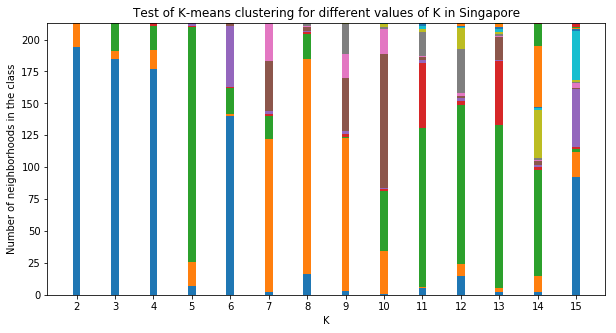

In [169]:
plt.figure(figsize=(10,5))

indx = np.arange(2,kmax+1)
prevbar = df_kmeans_results.iloc[:,1]
plt.bar(x=indx, height=prevbar, width=0.2)

for i in range(2,kmax+1):
    newbar = df_kmeans_results.iloc[:,i]
    plt.bar(x=indx, height=newbar, width=0.2, bottom=prevbar)
    prevbar += newbar

plt.xticks(indx)
plt.xlabel('K')
plt.ylabel('Number of neighborhoods in the class')
plt.title('Test of K-means clustering for different values of K in Singapore')

plt.savefig('./SG-Kmeans-NumNeigh.jpg', dpi=300)
plt.show()
plt.close()

A value that seems pretty good for subdividing the neighborhoods in roughly equivalent sizes and may allow the exclusion of a few neighborhoods (outliers) is K=7.

In [170]:
bestk = 7

In [171]:
kmeans_select = KMeans(n_clusters=bestk, random_state=0).fit(SG_clustering)
kmeans_select.labels_.shape

(213,)

In [172]:
SG_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Admiralty,Coffee Shop,Asian Restaurant,Food,Chinese Restaurant,Food Court
1,Admiralty 1,History Museum,Chinese Restaurant,Harbor / Marina,Pier,Halal Restaurant
2,Admiralty 2,Office,Food,Asian Restaurant,Building,Food Court
3,Alexandra,Chinese Restaurant,Coffee Shop,Asian Restaurant,Food Court,Dessert Shop
4,Alexandra 1,Café,Food Court,Asian Restaurant,Chinese Restaurant,Coffee Shop


In [173]:
# add clustering labels
SG_venues_sorted.insert(0, 'Cluster Labels', kmeans_select.labels_)

In [174]:
SG_venues_sorted.head()

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,6,Admiralty,Coffee Shop,Asian Restaurant,Food,Chinese Restaurant,Food Court
1,5,Admiralty 1,History Museum,Chinese Restaurant,Harbor / Marina,Pier,Halal Restaurant
2,6,Admiralty 2,Office,Food,Asian Restaurant,Building,Food Court
3,5,Alexandra,Chinese Restaurant,Coffee Shop,Asian Restaurant,Food Court,Dessert Shop
4,1,Alexandra 1,Café,Food Court,Asian Restaurant,Chinese Restaurant,Coffee Shop


In [175]:
SG_merged = Dist_SG.copy()
SG_merged = SG_merged.join(SG_venues_sorted.set_index('District'), on='Name')
SG_merged

,District,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Raffles Place,1.284100,103.851330,1.0,Italian Restaurant,Japanese Restaurant,Café,Chinese Restaurant,Hotel
1,1,Marina,1.280690,103.854300,1.0,Coffee Shop,Chinese Restaurant,Café,Japanese Restaurant,Hotel
2,1,Cecil,1.279480,103.848260,1.0,Café,Coffee Shop,Hotel,Korean Restaurant,Japanese Restaurant
3,2,Tanjong Pagar,1.278030,103.840450,1.0,Italian Restaurant,Café,Japanese Restaurant,Hotel,Korean Restaurant
4,2,Chinatown,1.281490,103.844820,1.0,Chinese Restaurant,Korean Restaurant,Hostel,Food Court,Bar
5,3,Tiong Bahru,1.286370,103.825300,5.0,Chinese Restaurant,Coffee Shop,Food Court,Bakery,Supermarket
6,3,Alexandra,1.286860,103.805090,5.0,Chinese Restaurant,Coffee Shop,Asian Restaurant,Food Court,Dessert Shop
7,3,Queenstown,1.294170,103.786130,1.0,Coffee Shop,Beer Bar,Noodle House,Food Court,Pizza Place
8,4,Mount Faber,1.271220,103.819710,5.0,Chinese Restaurant,Café,Bus Stop,Restaurant,Asian Restaurant
9,4,Telok Blangah,1.269150,103.814280,1.0,Indian Restaurant,Asian Restaurant,Café,Arcade,Board Shop


Some locations have no venues associated to them:

In [176]:
SG_merged['Cluster Labels'].isnull().sum(axis=0)

9

So we need to suppress them from the dataframe:

In [177]:
SG_merged.dropna(subset=['Cluster Labels'], axis=0, inplace=True)
SG_merged.head()

,District,Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Raffles Place,1.28410,103.85133,1.0,Italian Restaurant,Japanese Restaurant,Café,Chinese Restaurant,Hotel
1,1,Marina,1.28069,103.85430,1.0,Coffee Shop,Chinese Restaurant,Café,Japanese Restaurant,Hotel
2,1,Cecil,1.27948,103.84826,1.0,Café,Coffee Shop,Hotel,Korean Restaurant,Japanese Restaurant
3,2,Tanjong Pagar,1.27803,103.84045,1.0,Italian Restaurant,Café,Japanese Restaurant,Hotel,Korean Restaurant
4,2,Chinatown,1.28149,103.84482,1.0,Chinese Restaurant,Korean Restaurant,Hostel,Food Court,Bar


We now have everything to plot the classes on the map:

In [178]:
# converting labels into integers
SG_merged[['Cluster Labels']] = SG_merged[['Cluster Labels']].applymap(np.int64)

# create map
map_SG_6 = folium.Map(location=[latitude_SG, longitude_SG], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map  ## Since there is no index in SG_merged, we replaced SG_merged.index by range(SG_merged.shape[0]).
markers_colors = []
for i, lat, lon, posname, cluster in zip(range(SG_merged.shape[0]), SG_merged['Latitude'], SG_merged['Longitude'], SG_merged['Name'], SG_merged['Cluster Labels']):
    
    # Creating a string for the most frequent venues in a given district
    descripline = ''
    for j in range(num_top_venues):
        descripline += SG_merged.iloc[i,5+j] + ' <br> '
    #print(descripline)
    
    label = '<b>DISTRICT {}:</b> <br> <b>cluster type {}</b> <br> {}'.format(posname,cluster,descripline)
    label = folium.Popup(label, parse_html=False, max_width=200, min_width=200)
    
    folium.Circle(
        [lat, lon],
        radius=RADIUS,
        popup=label,
        #popup=None,
        color=rainbow[cluster-1],
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.2,
        parse_html=False).add_to(map_SG_6)

In [179]:
map_SG_6

In [180]:
map_SG_6.save(outfile='./SG6-RandLoc_clusters.html')

Saved Map:

<img src="./SG6-RandLoc_clusters.jpg" width="800" height="600">

We can see that the clustering seems to be much more trustable now that the sampling is more important.

In [181]:
def PrintCountVenues(cluster):
    tmp = pd.DataFrame(cluster.iloc[0:,1:].values.tolist())
    best5list = tmp[0].tolist()
    for i in range(1,5,1):
        best5list += tmp[i].tolist()
    print(Counter(best5list))

Let us explot the different clusters by plotting them one by one, with their dimension and counting the venues (restricted by the fact that we take the most common 5 venues in each neighbordhood).

In [182]:
for k in range(bestk):
    print('Cluster ' + str(k) + " :")
    print('===========')
    cluster = SG_merged.loc[SG_merged['Cluster Labels'] == k, SG_merged.columns[[1] + list(range(5, SG_merged.shape[1]))]]
    print(cluster.shape)
    PrintCountVenues(cluster)
    print("====================================================================================================================================================== \n")

Cluster 0 :
(2, 6)
Counter({'Harbor / Marina': 2, 'Zoo Exhibit': 2, 'Flower Shop': 2, 'Ice Cream Shop': 1, 'Fried Chicken Joint': 1, 'Fish & Chips Shop': 1, 'Food': 1})

Cluster 1 :
(122, 6)
Counter({'Café': 56, 'Coffee Shop': 34, 'Food Court': 34, 'Chinese Restaurant': 28, 'Japanese Restaurant': 27, 'Zoo Exhibit': 22, 'Hotel': 20, 'Bakery': 19, 'Park': 13, 'Supermarket': 13, 'Italian Restaurant': 12, 'Fast Food Restaurant': 12, 'Bus Station': 12, 'Flower Shop': 10, 'Fried Chicken Joint': 10, 'Bar': 9, 'Noodle House': 9, 'Sandwich Place': 9, 'Shopping Mall': 9, 'Ice Cream Shop': 8, 'Indian Restaurant': 6, 'Trail': 6, 'Dessert Shop': 6, 'Asian Restaurant': 6, 'Thai Restaurant': 6, 'Movie Theater': 5, 'Restaurant': 5, 'Clothing Store': 5, 'Bus Stop': 5, 'Convenience Store': 5, 'Korean Restaurant': 4, 'Cafeteria': 4, 'Pizza Place': 4, 'Gym': 4, 'Sushi Restaurant': 4, 'Flea Market': 4, 'Garden': 3, 'BBQ Joint': 3, 'Pool': 3, 'Metro Station': 3, 'Hostel': 3, 'Harbor / Marina': 3, 'Gastropub

Clusters 0, 3 and 4 are clearly outliers. The 4 other clusters have more meaning.

### HONG KONG

We now just have to proceed in the exact same way for Hong Kong. But instead of taking the district centers, we will take the cities centers so that we avoid too many locations in mountain areas.

In [183]:
Cities_HK = pd.read_csv('./HK_Cities.csv')
Cities_HK.drop('Unnamed: 0', axis=1, inplace=True)
Cities_HK

,City Name,Latitude,Longitude
0,Hong Kong,22.278320,114.174690
1,Kowloon,22.316669,114.183327
2,Tsuen Wan,22.370661,114.104790
3,Yuen Long Kau Hui,22.450001,114.033333
4,Tung Chung,22.287830,113.942429
5,Sha Tin,22.383329,114.183327
6,Tuen Mun,22.391750,113.971573
7,Tai Po,22.450069,114.168770
8,Sai Kung,22.383329,114.266670
9,Yung Shue Wan,22.226231,114.112411


In [184]:
Cities_HK.shape

(17, 3)

We generate new locations randomly, using the flat earth approximation considering that a few kilometers are much less than the Earth radius.

In [185]:
num_clones = 12 # This means for each location we generate num_clones new ones.
radius_rand = 1200
R_Earth = 6378137

for i in range(len(Cities_HK)):
    for j in range(num_clones):
        # New location:
        dn = random.randint(-radius_rand,radius_rand) # Change towards East (in meters)
        de = random.randint(-radius_rand,radius_rand) # Change towards North (in meters)
        dLat = dn / R_Earth
        dLon = de / (R_Earth * np.cos(np.pi * Cities_HK.iloc[i,2]/180.))
        new_lat = Cities_HK.iloc[i,1] + dLat * 180./np.pi
        new_lon = Cities_HK.iloc[i,2] + dLon * 180./np.pi
        # New name:
        new_name = str(Cities_HK.iloc[i,0]) + ' ' + str(j+1)
        # Appending that new row to the table:
        Cities_HK = Cities_HK.append([{'City Name':new_name, 'Latitude':new_lat, 'Longitude':new_lon}], ignore_index=True)

In [186]:
Cities_HK.shape

(221, 3)

We will choose a radius of:

In [187]:
RADIUS = 500

Let's plot the new locations:

In [188]:
# creating the map
map_HK_5 = folium.Map(location=[latitude_HK, longitude_HK], zoom_start=11)

# adding markers
for lat, lng, name in zip(Cities_HK['Latitude'], Cities_HK['Longitude'], Cities_HK['City Name']):
    label = 'District {}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=RADIUS,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_HK_5)

In [189]:
map_HK_5

In [190]:
map_HK_5.save(outfile='./HK6-RandLoc.html')

Saved Map:

<img src="./HK6-RandLoc.jpg" width="800" height="600">

These locations are satisfying and we can proceed.

In [191]:
Cities_HK.head()

,City Name,Latitude,Longitude
0,Hong Kong,22.278320,114.174690
1,Kowloon,22.316669,114.183327
2,Tsuen Wan,22.370661,114.104790
3,Yuen Long Kau Hui,22.450001,114.033333
4,Tung Chung,22.287830,113.942429


In [192]:
LIMIT = 100

########## GET VENUES FROM FOURSQUARE ##########

### Venues_HK_2 = getNearbyVenues(names=Cities_HK['City Name'], latitudes=Cities_HK['Latitude'], longitudes=Cities_HK['Longitude'], radius=RADIUS, limit=LIMIT)

In [193]:
########## SAVING THESE VENUES ##########

### Venues_HK_2.to_csv(r'./Venues_HK_2.csv')

In [194]:
########## LOADING VENUES FROM SAVED CSV ##########

Venues_HK_2 = pd.read_csv('./Venues_HK_2.csv')

In [195]:
Venues_HK_2.groupby('Neighbourhood').count()

,Unnamed: 0,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,,
Central,100,100,100,100,100,100,100
Central 1,50,50,50,50,50,50,50
Central 10,11,11,11,11,11,11,11
Central 11,12,12,12,12,12,12,12
Central 12,69,69,69,69,69,69,69
Central 2,52,52,52,52,52,52,52
Central 3,88,88,88,88,88,88,88
Central 4,41,41,41,41,41,41,41
Central 5,89,89,89,89,89,89,89


In [196]:
print('There are {} uniques categories.'.format(len(Venues_HK_2['Venue Category'].unique())))

HK_onehot = pd.get_dummies(Venues_HK_2[['Venue Category']], prefix="", prefix_sep="")
HK_onehot['District'] = Venues_HK_2['Neighbourhood']
fixed_columns = [HK_onehot.columns[-1]] + list(HK_onehot.columns[:-1])
HK_onehot = HK_onehot[fixed_columns]

print(HK_onehot.shape)

There are 248 uniques categories.
(3801, 249)


In [197]:
HK_onehot.head()

,District,Accessories Store,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Hong Kong,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hong Kong,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hong Kong,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hong Kong,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Hong Kong,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
HK_grouped = HK_onehot.groupby('District').mean().reset_index() ## We don't want to group the values per district centers anymore!
print(HK_grouped.shape)

(178, 249)


In [199]:
HK_grouped.head()

,District,Accessories Store,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Waterfall,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Yunnan Restaurant,Zhejiang Restaurant,Zoo
0,Central,0.0,0.010000,0.0,0.0,0.0,0.01,0.0,0.01,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.03,0.0,0.0,0.0
1,Central 1,0.0,0.020000,0.0,0.0,0.0,0.02,0.0,0.00,0.0,...,0.0,0.0,0.0,0.020000,0.0,0.0,0.00,0.0,0.0,0.0
2,Central 10,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.090909,0.0,0.0,0.00,0.0,0.0,0.0
3,Central 11,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.083333,0.0,0.0,0.00,0.0,0.0,0.0
4,Central 12,0.0,0.014493,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0


In [200]:
num_top_venues = 5
HK_venues_sorted = top_venues_sorted(HK_grouped, 'District', num_top_venues)
HK_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central,Hotel,Lounge,French Restaurant,Italian Restaurant,Japanese Restaurant
1,Central 1,Sandwich Place,Sushi Restaurant,Supermarket,Italian Restaurant,Coffee Shop
2,Central 10,Sushi Restaurant,Supermarket,French Restaurant,Bar,Boat or Ferry
3,Central 11,Hotel Bar,Beer Garden,Bar,Pier,Sushi Restaurant
4,Central 12,Coffee Shop,Lounge,Italian Restaurant,Chinese Restaurant,Cantonese Restaurant
5,Central 2,Café,Coffee Shop,Cantonese Restaurant,Dessert Shop,Chinese Restaurant
6,Central 3,Coffee Shop,Lounge,Cantonese Restaurant,Hotel Bar,Italian Restaurant
7,Central 4,Italian Restaurant,Coffee Shop,Vietnamese Restaurant,Café,Bar
8,Central 5,Café,Coffee Shop,Italian Restaurant,Chinese Restaurant,Thai Restaurant
9,Central 6,Café,Hotel,Italian Restaurant,Clothing Store,Hotel Bar


Instead of fixing a value for the number of clusters, we will run through different values and visualize the number of elements in each class for different k's.

In [201]:
HK_clustering = HK_grouped.drop('District', axis=1)

# run k-means clustering for different values
kmax = 15
kmeans_results = []

for kclusters in range(2,kmax+1,1):
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(HK_clustering)
    # print(kclusters, Counter(kmeans.labels_.tolist()))
    
    # building the dataframe with values
    test = []
    test.append(kclusters)
    values = Counter(kmeans.labels_.tolist())
    for i in range(kmax):
        if ( 0 <= i <= kclusters ):
            test.append(values[i])
        else:
            test.append(0)
    #print(test)
    kmeans_results.append(test)
    
kmeans_results

[[2, 157, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3, 153, 9, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4, 153, 9, 6, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5, 142, 4, 2, 17, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [6, 4, 149, 8, 8, 2, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [7, 143, 12, 4, 2, 2, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0],
 [8, 7, 138, 5, 6, 5, 11, 4, 2, 0, 0, 0, 0, 0, 0, 0],
 [9, 10, 139, 3, 9, 2, 6, 4, 2, 3, 0, 0, 0, 0, 0, 0],
 [10, 6, 9, 138, 6, 1, 2, 8, 2, 4, 2, 0, 0, 0, 0, 0],
 [11, 9, 6, 2, 4, 131, 6, 5, 2, 1, 10, 2, 0, 0, 0, 0],
 [12, 10, 3, 6, 127, 7, 1, 5, 4, 2, 9, 2, 2, 0, 0, 0],
 [13, 9, 6, 2, 4, 128, 6, 5, 2, 1, 10, 2, 1, 2, 0, 0],
 [14, 132, 10, 6, 9, 3, 4, 2, 1, 1, 2, 1, 2, 3, 2, 0],
 [15, 2, 22, 8, 2, 7, 4, 3, 34, 3, 1, 78, 10, 2, 1, 1]]

In [202]:
col = ['K']
for x in range(1,kmax+1):
    col.append('Count Class ' + str(x))

In [203]:
df_kmeans_results = pd.DataFrame(kmeans_results, columns=col)
df_kmeans_results

,K,Count Class 1,Count Class 2,Count Class 3,Count Class 4,Count Class 5,Count Class 6,Count Class 7,Count Class 8,Count Class 9,Count Class 10,Count Class 11,Count Class 12,Count Class 13,Count Class 14,Count Class 15
0,2,157,21,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,153,9,16,0,0,0,0,0,0,0,0,0,0,0,0
2,4,153,9,6,10,0,0,0,0,0,0,0,0,0,0,0
3,5,142,4,2,17,13,0,0,0,0,0,0,0,0,0,0
4,6,4,149,8,8,2,7,0,0,0,0,0,0,0,0,0
5,7,143,12,4,2,2,9,6,0,0,0,0,0,0,0,0
6,8,7,138,5,6,5,11,4,2,0,0,0,0,0,0,0
7,9,10,139,3,9,2,6,4,2,3,0,0,0,0,0,0
8,10,6,9,138,6,1,2,8,2,4,2,0,0,0,0,0
9,11,9,6,2,4,131,6,5,2,1,10,2,0,0,0,0


Let us build a bar plot to see how the classes are represented.

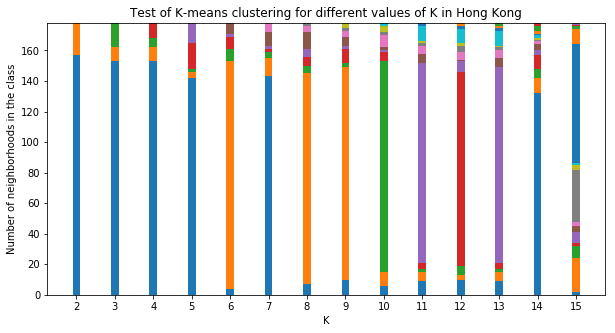

In [204]:
plt.figure(figsize=(10,5))

indx = np.arange(2,kmax+1)
prevbar = df_kmeans_results.iloc[:,1]
plt.bar(x=indx, height=prevbar, width=0.2)

for i in range(2,kmax+1):
    newbar = df_kmeans_results.iloc[:,i]
    plt.bar(x=indx, height=newbar, width=0.2, bottom=prevbar)
    prevbar += newbar

plt.xticks(indx)
plt.xlabel('K')
plt.ylabel('Number of neighborhoods in the class')
plt.title('Test of K-means clustering for different values of K in Hong Kong')

plt.savefig('./HK-Kmeans-NumNeigh.jpg', dpi=300)
plt.show()
plt.close()

A value that seems pretty good for subdividing the neighborhoods in roughly equivalent sizes and may allow the exclusion of a few neighborhoods (outliers) is K=15.

In [205]:
bestk = 15

In [206]:
kmeans_select = KMeans(n_clusters=bestk, random_state=0).fit(HK_clustering)
kmeans_select.labels_.shape

(178,)

In [207]:
HK_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Central,Hotel,Lounge,French Restaurant,Italian Restaurant,Japanese Restaurant
1,Central 1,Sandwich Place,Sushi Restaurant,Supermarket,Italian Restaurant,Coffee Shop
2,Central 10,Sushi Restaurant,Supermarket,French Restaurant,Bar,Boat or Ferry
3,Central 11,Hotel Bar,Beer Garden,Bar,Pier,Sushi Restaurant
4,Central 12,Coffee Shop,Lounge,Italian Restaurant,Chinese Restaurant,Cantonese Restaurant


In [208]:
# add clustering labels
HK_venues_sorted.insert(0, 'Cluster Labels', kmeans_select.labels_)

In [209]:
HK_venues_sorted.head()

,Cluster Labels,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,10,Central,Hotel,Lounge,French Restaurant,Italian Restaurant,Japanese Restaurant
1,10,Central 1,Sandwich Place,Sushi Restaurant,Supermarket,Italian Restaurant,Coffee Shop
2,10,Central 10,Sushi Restaurant,Supermarket,French Restaurant,Bar,Boat or Ferry
3,10,Central 11,Hotel Bar,Beer Garden,Bar,Pier,Sushi Restaurant
4,10,Central 12,Coffee Shop,Lounge,Italian Restaurant,Chinese Restaurant,Cantonese Restaurant


In [210]:
HK_merged = Cities_HK.copy()
HK_merged = HK_merged.join(HK_venues_sorted.set_index('District'), on='City Name')
HK_merged

,City Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Hong Kong,22.278320,114.174690,10.0,Café,Chinese Restaurant,Coffee Shop,Thai Restaurant,Lounge
1,Kowloon,22.316669,114.183327,7.0,Fast Food Restaurant,Chinese Restaurant,Athletics & Sports,Supermarket,Playground
2,Tsuen Wan,22.370661,114.104790,10.0,Supermarket,Grocery Store,Café,Food Court,Gastropub
3,Yuen Long Kau Hui,22.450001,114.033333,0.0,Playground,Train Station,Gay Bar,Gas Station,Garden
4,Tung Chung,22.287830,113.942429,10.0,Clothing Store,Sporting Goods Shop,Sushi Restaurant,Café,Cantonese Restaurant
5,Sha Tin,22.383329,114.183327,10.0,Dim Sum Restaurant,Temple,Vegetarian / Vegan Restaurant,Cantonese Restaurant,Campground
6,Tuen Mun,22.391750,113.971573,10.0,Shopping Mall,Coffee Shop,Zoo,Burger Joint,Convenience Store
7,Tai Po,22.450069,114.168770,7.0,Chinese Restaurant,Hong Kong Restaurant,Noodle House,Shopping Mall,Italian Restaurant
8,Sai Kung,22.383329,114.266670,10.0,Dessert Shop,Bowling Alley,Grocery Store,Pizza Place,Gay Bar
9,Yung Shue Wan,22.226231,114.112411,1.0,Seafood Restaurant,Café,Chinese Restaurant,Burger Joint,Comfort Food Restaurant


Some locations have no venues associated to them:

In [211]:
HK_merged['Cluster Labels'].isnull().sum(axis=0)

43

So we need to suppress them from the dataframe:

In [212]:
HK_merged.dropna(subset=['Cluster Labels'], axis=0, inplace=True)
HK_merged.head()

,City Name,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Hong Kong,22.278320,114.174690,10.0,Café,Chinese Restaurant,Coffee Shop,Thai Restaurant,Lounge
1,Kowloon,22.316669,114.183327,7.0,Fast Food Restaurant,Chinese Restaurant,Athletics & Sports,Supermarket,Playground
2,Tsuen Wan,22.370661,114.104790,10.0,Supermarket,Grocery Store,Café,Food Court,Gastropub
3,Yuen Long Kau Hui,22.450001,114.033333,0.0,Playground,Train Station,Gay Bar,Gas Station,Garden
4,Tung Chung,22.287830,113.942429,10.0,Clothing Store,Sporting Goods Shop,Sushi Restaurant,Café,Cantonese Restaurant


We now have everything to plot the classes on the map:

In [213]:
# converting labels into integers
HK_merged[['Cluster Labels']] = HK_merged[['Cluster Labels']].applymap(np.int64)

# create map
map_HK_6 = folium.Map(location=[latitude_HK, longitude_HK], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map  ## Since there is no index in SG_merged, we replaced SG_merged.index by range(SG_merged.shape[0]).
markers_colors = []
for i, lat, lon, posname, cluster in zip(range(HK_merged.shape[0]), HK_merged['Latitude'], HK_merged['Longitude'], HK_merged['City Name'], SG_merged['Cluster Labels']):
    
    # Creating a string for the most frequent venues in a given district
    descripline = ''
    for j in range(num_top_venues):
        descripline += SG_merged.iloc[i,5+j] + ' <br> '
    #print(descripline)
    
    label = '<b>DISTRICT {}:</b> <br> <b>cluster type {}</b> <br> {}'.format(posname,cluster,descripline)
    label = folium.Popup(label, parse_html=False, max_width=200, min_width=200)
    
    folium.Circle(
        [lat, lon],
        radius=RADIUS,
        popup=label,
        #popup=None,
        color=rainbow[cluster-1],
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.2,
        parse_html=False).add_to(map_HK_6)

In [214]:
map_HK_6

In [215]:
map_HK_6.save(outfile='./HK7-RandLoc_clusters.html')

Saved Map:

<img src="./HK7-RandLoc_clusters.jpg" width="800" height="600">

We can see that the clustering also seems much more trustable here now that the sampling is more important.

Let us explot the different clusters by plotting them one by one, with their dimension and counting the venues (restricted by the fact that we take the most common 5 venues in each neighbordhood).

In [216]:
for k in range(bestk):
    print('Cluster ' + str(k) + " :")
    print('===========')
    cluster = HK_merged.loc[HK_merged['Cluster Labels'] == k, HK_merged.columns[[1] + list(range(4, HK_merged.shape[1]))]]
    print(cluster.shape)
    PrintCountVenues(cluster)
    print("====================================================================================================================================================== \n")

Cluster 0 :
(2, 6)
Counter({'Playground': 2, 'Gas Station': 2, 'Garden': 2, 'Train Station': 1, 'Zoo': 1, 'Gay Bar': 1, 'Fish Market': 1})

Cluster 1 :
(22, 6)
Counter({'Café': 14, 'Seafood Restaurant': 13, 'Chinese Restaurant': 10, 'Dessert Shop': 7, 'Coffee Shop': 7, 'Park': 5, 'Zoo': 5, 'Gas Station': 4, 'Garden': 4, 'Snack Place': 3, 'Thai Restaurant': 3, 'Pub': 3, 'Playground': 2, 'Bay': 2, 'Fish Market': 2, 'Pier': 2, 'Gastropub': 2, 'Beach': 1, 'Soccer Field': 1, 'Plaza': 1, 'Health Food Store': 1, 'Hotel': 1, 'Accessories Store': 1, 'Basketball Court': 1, 'Indian Restaurant': 1, 'Bookstore': 1, 'Flea Market': 1, 'Track': 1, 'Burger Joint': 1, 'Buffet': 1, 'Bus Station': 1, 'Convenience Store': 1, 'Sri Lankan Restaurant': 1, 'Comfort Food Restaurant': 1, 'Dive Bar': 1, 'Historic Site': 1, 'Bakery': 1, 'Veterinarian': 1, 'Forest': 1})

Cluster 2 :
(8, 6)
Counter({'Mountain': 8, 'Zoo': 8, 'Gas Station': 7, 'Fish Market': 5, 'Garden': 5, 'Trail': 2, 'Gay Bar': 2, 'Bakery': 1, 'Flea

Clusters 1, 7 and 10 are the clusters who really make sense here. We should remember also that a lot of locations (43) did not return any venues and had to be suppressed. These locations were certainly in places with no or very few inhabitants.

## 3.2 - Comparing the Tigers with a decision tree <a id="32"></a>

We now use a supervised learning method to know what makes a Singaporian neighborhood or a Hong Kong neighborhood so particular. For that we will train a decision tree.

In [217]:
tmpSG = SG_grouped.copy()
tmpHK = HK_grouped.copy()

In [218]:
tmpSG['District'] = tmpSG['District'].apply(lambda x: 'SG Center ' + str(x))
tmpHK['District'] = tmpHK['District'].apply(lambda x: 'HK Center ' + str(x))

In [219]:
SGHKvenues = pd.concat([tmpSG,tmpHK],axis=0,join='outer',sort=False)

In [220]:
SGHKvenues.replace(np.nan,0., inplace=True)

In [221]:
print(tmpSG.shape)
print(tmpHK.shape)
print(SGHKvenues.shape)

(213, 339)
(178, 249)
(391, 387)


In [222]:
print("There are %s common venues between Singapore and Hong Kong." % str(tmpSG.shape[1] + tmpHK.shape[1] - SGHKvenues.shape[1] - 1)) # -1 is to remove Neighbourhood into the counting.

There are 200 common venues between Singapore and Hong Kong.


In [223]:
venues_names = SGHKvenues.columns.tolist()[1:]
print(venues_names)

['Accessories Store', 'Airport', 'Airport Lounge', 'Airport Service', 'Airport Terminal', 'American Restaurant', 'Aquarium', 'Arcade', 'Argentinian Restaurant', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant', 'Athletics & Sports', 'Australian Restaurant', 'Auto Garage', 'BBQ Joint', 'Badminton Court', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Baseball Field', 'Baseball Stadium', 'Basketball Court', 'Bay', 'Beach', 'Beach Bar', 'Bed & Breakfast', 'Beer Bar', 'Beer Garden', 'Bike Rental / Bike Share', 'Bike Shop', 'Bike Trail', 'Bistro', 'Board Shop', 'Boarding House', 'Boat or Ferry', 'Bookstore', 'Botanical Garden', 'Boutique', 'Bowling Alley', 'Breakfast Spot', 'Brewery', 'Bridge', 'Bubble Tea Shop', 'Buddhist Temple', 'Buffet', 'Building', 'Burger Joint', 'Burmese Restaurant', 'Burrito Place', 'Bus Line', 'Bus Station', 'Bus Stop', 'Business Service', 'Cable Car', 'Cafeteria', 'Café', 'Campground', 'Canal', 'Candy Store', 'Cantonese Restaurant', 'Casino', 'Chees

In [224]:
SGHKvenues.reset_index(inplace=True)
SGHKvenues.drop("index", axis=1, inplace=True)
SGHKvenues

,District,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,...,Social Club,Souvenir Shop,Sri Lankan Restaurant,Stationery Store,Summer Camp,Tram Station,Tree,Village,Waterfall,Yunnan Restaurant
0,SG Center Admiralty,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,SG Center Admiralty 1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,SG Center Admiralty 2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,SG Center Alexandra,0.000000,0.0,0.0,0.0,0.0,0.019231,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,SG Center Alexandra 1,0.000000,0.0,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5,SG Center Alexandra 2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
6,SG Center Ang Mo Kio,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
7,SG Center Ang Mo Kio 1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
8,SG Center Ang Mo Kio 2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
9,SG Center Balestier,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [225]:
allisone = True
for i in range(len(SGHKvenues)):
    if (abs(SGHKvenues.iloc[i,1:].astype('float64').sum() - 1.0) > 0.00001):
        allisone = False

if allisone == True:
    print("Good! Columns sum up to 1 for each row.")
else:
    print("Bad! Columns do not sum up to 1 for each row.")

Good! Columns sum up to 1 for each row.


Let's affect a class for Singapore (0) and a class for Hong Kong (1).

In [226]:
def affectClass (row):
    test = row['District'][:2]
    return test

In [227]:
SGHKvenues['Class'] = SGHKvenues.apply(affectClass, axis=1)
SGHKvenues

,District,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,...,Souvenir Shop,Sri Lankan Restaurant,Stationery Store,Summer Camp,Tram Station,Tree,Village,Waterfall,Yunnan Restaurant,Class
0,SG Center Admiralty,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG
1,SG Center Admiralty 1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG
2,SG Center Admiralty 2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG
3,SG Center Alexandra,0.000000,0.0,0.0,0.0,0.0,0.019231,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG
4,SG Center Alexandra 1,0.000000,0.0,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG
5,SG Center Alexandra 2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG
6,SG Center Ang Mo Kio,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG
7,SG Center Ang Mo Kio 1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG
8,SG Center Ang Mo Kio 2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG
9,SG Center Balestier,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,SG


In [228]:
X = SGHKvenues.drop(columns=['District','Class'],axis=0)
X.head()

,Accessories Store,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Social Club,Souvenir Shop,Sri Lankan Restaurant,Stationery Store,Summer Camp,Tram Station,Tree,Village,Waterfall,Yunnan Restaurant
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.019231,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
y = SGHKvenues['Class']

In [230]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [231]:
print(y_trainset.tolist())
print(y_testset.tolist())

['HK', 'SG', 'HK', 'HK', 'HK', 'SG', 'HK', 'SG', 'HK', 'SG', 'SG', 'HK', 'SG', 'SG', 'SG', 'HK', 'HK', 'SG', 'SG', 'SG', 'SG', 'SG', 'HK', 'SG', 'HK', 'SG', 'SG', 'HK', 'SG', 'HK', 'HK', 'HK', 'SG', 'HK', 'SG', 'SG', 'HK', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'HK', 'SG', 'HK', 'SG', 'HK', 'SG', 'HK', 'HK', 'HK', 'HK', 'HK', 'SG', 'HK', 'SG', 'HK', 'SG', 'SG', 'HK', 'HK', 'SG', 'HK', 'SG', 'SG', 'SG', 'HK', 'HK', 'HK', 'HK', 'SG', 'SG', 'SG', 'SG', 'HK', 'HK', 'SG', 'HK', 'HK', 'HK', 'SG', 'SG', 'SG', 'HK', 'SG', 'SG', 'HK', 'HK', 'SG', 'HK', 'HK', 'SG', 'HK', 'SG', 'SG', 'SG', 'HK', 'HK', 'HK', 'SG', 'SG', 'HK', 'HK', 'SG', 'SG', 'HK', 'SG', 'SG', 'HK', 'SG', 'HK', 'SG', 'HK', 'SG', 'SG', 'HK', 'SG', 'HK', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'HK', 'HK', 'SG', 'HK', 'SG', 'SG', 'SG', 'HK', 'SG', 'SG', 'SG', 'HK', 'HK', 'HK', 'HK', 'SG', 'SG', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'SG', 'SG', 'HK', 'HK', 'SG', 'SG', 'HK', 'HK', 'HK', 'HK', 'SG', 'SG', 'HK', 'SG', 'SG', 'SG', 'SG

Modeling:

In [232]:
districtTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
districtTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Prediction:

In [233]:
predTree = districtTree.predict(X_testset)
predTree

array(['HK', 'HK', 'HK', 'HK', 'HK', 'SG', 'HK', 'HK', 'HK', 'HK', 'HK',
       'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'SG', 'HK', 'HK', 'HK', 'SG',
       'HK', 'SG', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'SG', 'HK',
       'HK', 'SG', 'HK', 'HK', 'SG', 'HK', 'HK', 'SG', 'HK', 'SG', 'HK',
       'HK', 'SG', 'SG', 'SG', 'HK', 'HK', 'SG', 'SG', 'HK', 'HK', 'HK',
       'HK', 'HK', 'SG', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'SG', 'HK',
       'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'SG', 'SG', 'SG', 'SG',
       'SG', 'HK', 'HK', 'HK', 'SG', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK',
       'SG', 'SG', 'SG', 'HK', 'HK', 'SG', 'SG', 'HK', 'HK', 'SG', 'HK',
       'HK', 'SG', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'SG', 'HK', 'HK',
       'HK', 'HK', 'HK', 'HK', 'HK', 'SG', 'SG', 'HK'], dtype=object)

Evaluation:

In [234]:
print("Decision tree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Decision tree's Accuracy:  0.652542372881356


Visualizing the tree:

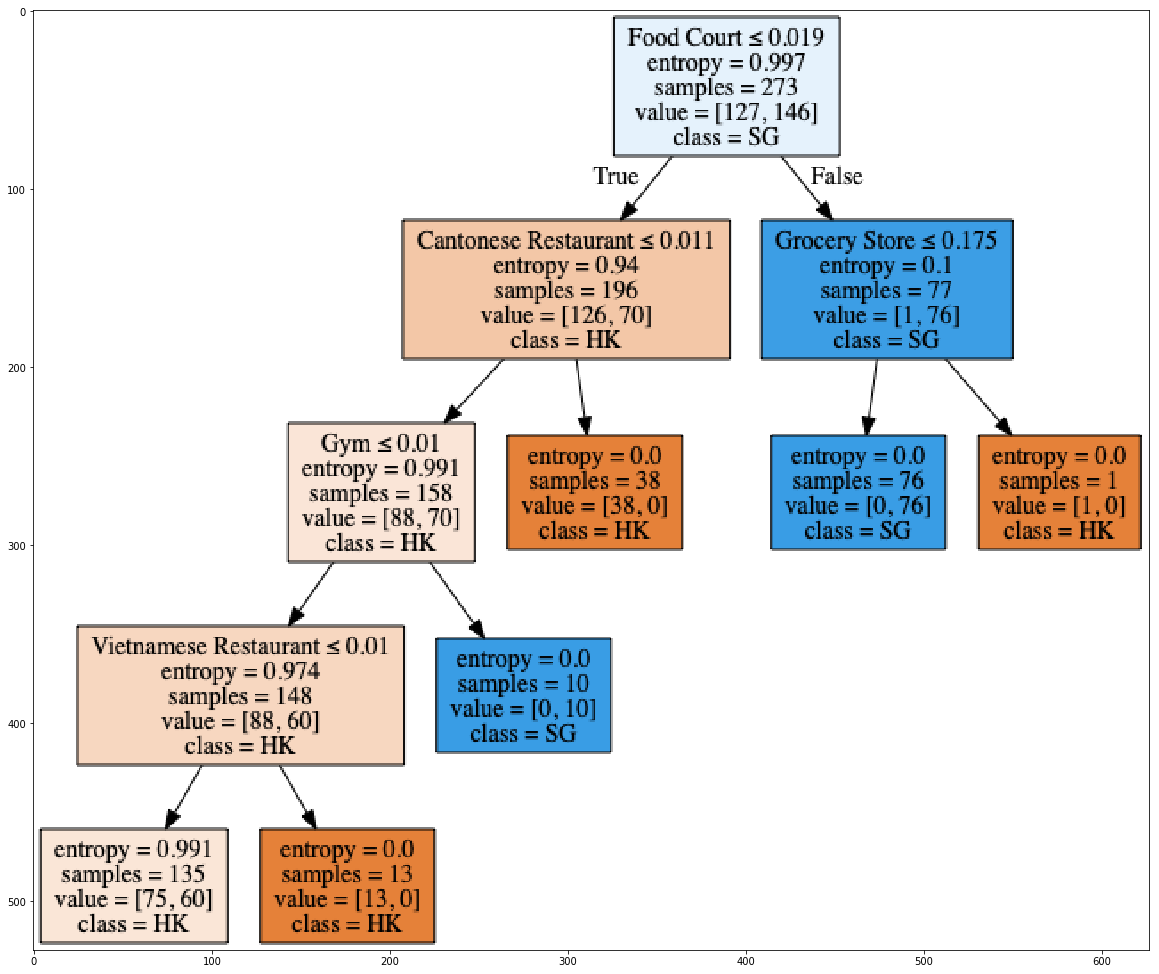

In [239]:
dot_data = StringIO()
filename = "district_tree.jpg"
featureNames = SGHKvenues.drop(['District','Class'],axis=1).columns
targetNames = SGHKvenues['Class'].astype('str').unique().tolist()

out=tree.export_graphviz(districtTree,
                         feature_names=featureNames,
                         out_file=dot_data,
                         class_names=np.unique(y_trainset),
                         filled=True,
                         special_characters=True,
                         rotate=False)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(20, 20))
plt.imshow(img,interpolation='nearest')

Saved Decision Tree:

<img src="./district_tree.jpg" width="800" height="600">

The decision tree gives us indications on the most relevant venues to separate Singapore and Hong Kong into different categories.

In [243]:
print("Number of Food Courts in HK: ", HK_onehot['Food Court'].sum())
print("Number of Food Courts in SG: ", SG_onehot['Food Court'].sum())
print("")
print("Number of Grocery Stores in HK: ", HK_onehot['Grocery Store'].sum())
print("Number of Grocery Stores in SG: ", SG_onehot['Grocery Store'].sum())
print("")
print("Number of Cantonese Restaurants in HK: ", HK_onehot['Cantonese Restaurant'].sum())
print("Number of Cantonese Restaurants in SG: ", SG_onehot['Cantonese Restaurant'].sum())
print("")
print("Number of Gyms in HK: ", HK_onehot['Gym'].sum())
print("Number of Gyms in SG: ", SG_onehot['Gym'].sum())
print("")
print("Number of Vietnamese Restaurants in HK: ", HK_onehot['Vietnamese Restaurant'].sum())
print("Number of Vietnamese Restaurants in SG: ", SG_onehot['Vietnamese Restaurant'].sum())
print("")

Number of Food Courts in HK:  10
Number of Food Courts in SG:  205

Number of Grocery Stores in HK:  25
Number of Grocery Stores in SG:  38

Number of Cantonese Restaurants in HK:  100
Number of Cantonese Restaurants in SG:  9

Number of Gyms in HK:  13
Number of Gyms in SG:  39

Number of Vietnamese Restaurants in HK:  48
Number of Vietnamese Restaurants in SG:  20




**Interpretation:**
As we can see from the decision tree and the prints above:

- SG has much more Food Courts than HK
- SG has a bit more Grocery Stores than HK
- HK has much more Cantonese Restaurants than SG (as we would expect)
- SG has more Gyms than HK
- HK has more Vietnamese Restaurants than SG

## SOME OTHER IDEAS

DO CLUSTERING OF NEIGHBORHOODS

ALSO TRY CLASSIFICATION BY MIXING THE TWO TABLES OF VENUES AND TRAINING THE MODEL TO SEE IF HE CAN THEN ATTRIBUTE A LOCATION TO THEM (SINGAPORE, HONG KONG)

TRAIN A MODEL WITH KNN AND THEN TAKE A FEW NEIGHBORHOODS IN THE WORLD TO TELL IF THEY ARE MORE LIKE SINGAPORE OR HONG KONG

I COULD ALSO GENERAL 'FAKE' LOCATIONS, I.E. PLACES THAT I GENERATE RANDOMLY AROUND THE DISTRICT CENTERS, AND THEN GETTING THE VENUES THERE TO GET MORE SAMPLES FOR BOTH SINGAPORE AND HONG KONG

DO SOME CONFUSION MATRIX

In [237]:
TAKE ALL THE CLASSIFIED POINTS (LAT, LONG) AND DO SUPERVISED LEARNING ON THEM TO SEE IF WE CAN ISOLATE AREAS.

SyntaxError: invalid syntax (<ipython-input-237-ab8bcc0954f4>, line 1)